# Workshop for FME ZeMe - 9$^{th}$ Dec. 2025
## Plotting and Statistics in Python

**FME ZeMe - Zero Emission Metal Production**  
*Norwegian Research Centre for Sustainable Metallurgy*

---

### Workshop Overview

This workshop demonstrates Python tools for analyzing metallurgical process data, focusing on:
- **Metal Production**: Mn, Si, Al, and ferroalloys
- **Process Optimization**: Temperature, composition, energy efficiency
- **Environmental Impact**: CO₂ emissions and carbon neutrality

### Learning Path
1. DataFrames using Pandas and simple plotting
2. Multi-axis plots
3. Regression and curve fitting
4. 3D visualization (surfaces, contours)
5. Statistical analysis (error bars, distributions, significance)
6. Advanced visualization (scatter matrices, violin plots)

### Required Libraries

In [1]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

print('Libraries loaded successfully!')

Libraries loaded successfully!


---
# Part 1: Introduction to Pandas & Simple 1D Plotting

### Dataset 1: Ferroalloy Global Production

Ref   <https://datasource.kapsarc.org/explore/dataset/production-of-ferro-alloys>

Export the csv file from the webpage above

In [ ]:
# Base URL for raw files from our repository
base_url = "https://raw.githubusercontent.com/TomasManik/FME-ZeMe-DigiWorkshop2025/refs/heads/main/data/"

# Load ferroalloy production data
df = pd.read_csv(base_url + "production-of-ferro-alloys.csv", sep=';')

In [2]:
# Load ferroalloy production data
df = pd.read_csv('production-of-ferro-alloys.csv', sep=';')
print(df.head(10))

          Country           Sub-commodity  Year  Production
0             USA            Ferro-chrome  1983     18078.0
1             USA     Ferro-silico-chrome  1983     14942.0
2             USA           Ferro-silicon  1983    284958.0
3  United Kingdom         Ferro-manganese  1983     82800.0
4       Venezuela           Ferro-silicon  1983     46636.0
5      Yugoslavia            Ferro-nickel  1983      3000.0
6        Zimbabwe         Ferro-manganese  1983      2085.0
7         Albania            Ferro-chrome  1984     40000.0
8       Argentina         Ferro-manganese  1984     28016.0
9       Argentina  Ferro-silico-manganese  1984     13336.0


In [3]:
df.shape

(7930, 4)

In [4]:
df.columns

Index(['Country', 'Sub-commodity', 'Year', 'Production'], dtype='object')

In [5]:
df

Country           Sub-commodity  Year  Production
0                USA            Ferro-chrome  1983     18078.0
1                USA     Ferro-silico-chrome  1983     14942.0
2                USA           Ferro-silicon  1983    284958.0
3     United Kingdom         Ferro-manganese  1983     82800.0
4          Venezuela           Ferro-silicon  1983     46636.0
...              ...                     ...   ...         ...
7925          Norway           Silicon metal  2023    220000.0
7926          Poland      Other ferro-alloys  2023     30000.0
7927          Russia            Ferro-chrome  2023    300000.0
7928       Venezuela            Ferro-nickel  2023      1600.0
7929       Venezuela  Ferro-silico-manganese  2023      4000.0

[7930 rows x 4 columns]

In [6]:
df[df['Country'] == 'USA']

Country                                 Sub-commodity  Year  Production
0        USA                                  Ferro-chrome  1983     18078.0
1        USA                           Ferro-silico-chrome  1983     14942.0
2        USA                                 Ferro-silicon  1983    284958.0
67       USA                              Ferro-phosphorus  1985     56211.0
103      USA                              Ferro-phosphorus  1986     52750.0
...      ...                                           ...   ...         ...
7668     USA                           Ferro-silico-chrome  1979     43221.0
7705     USA                                  Ferro-chrome  1980    167292.0
7706     USA                        Ferro-silico-manganese  1980    170838.0
7707     USA                            Other ferro-alloys  1980    114509.0
7812     USA  Ferro-Alloys (Ferro-silicon & silicon metal)  2018    430000.0

[238 rows x 4 columns]

In [7]:
df[(df['Country'] == 'USA') & (df['Sub-commodity'] == 'Ferro-manganese')]

Country    Sub-commodity  Year  Production
142      USA  Ferro-manganese  1987    102462.0
1066     USA  Ferro-manganese  1974    493836.0
1274     USA  Ferro-manganese  1980    171886.0
1596     USA  Ferro-manganese  1983     77954.0
1629     USA  Ferro-manganese  1984    155246.0
2796     USA  Ferro-manganese  1975    522365.0
3191     USA  Ferro-manganese  1981    174805.0
4307     USA  Ferro-manganese  1971    689366.0
4408     USA  Ferro-manganese  1976    437864.0
4478     USA  Ferro-manganese  1978    247235.0
4523     USA  Ferro-manganese  1979    287670.0
4811     USA  Ferro-manganese  1982    108136.0
4979     USA  Ferro-manganese  1986    106474.0
5866     USA  Ferro-manganese  1972    726404.0
5997     USA  Ferro-manganese  1977    303121.0
6482     USA  Ferro-manganese  1985    139298.0
7476     USA  Ferro-manganese  1973    619675.0

In [8]:
df2 = df[(df['Country'] == 'USA') & (df['Sub-commodity'] == 'Ferro-manganese')]

In [9]:
df2['Year']

142     1987
1066    1974
1274    1980
1596    1983
1629    1984
2796    1975
3191    1981
4307    1971
4408    1976
4478    1978
4523    1979
4811    1982
4979    1986
5866    1972
5997    1977
6482    1985
7476    1973
Name: Year, dtype: int64

In [10]:
df2['Production']

142     102462.0
1066    493836.0
1274    171886.0
1596     77954.0
1629    155246.0
2796    522365.0
3191    174805.0
4307    689366.0
4408    437864.0
4478    247235.0
4523    287670.0
4811    108136.0
4979    106474.0
5866    726404.0
5997    303121.0
6482    139298.0
7476    619675.0
Name: Production, dtype: float64

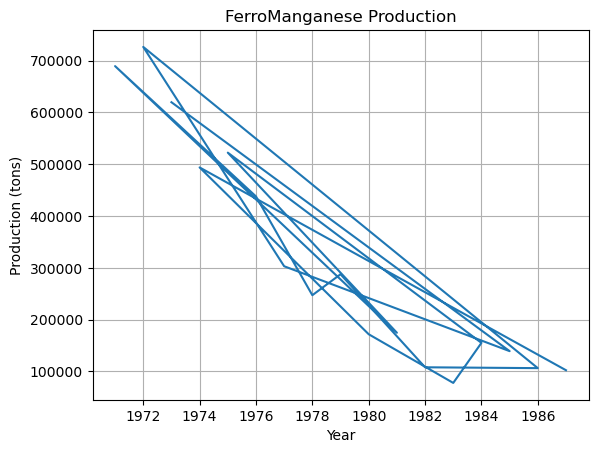

In [11]:
plt.plot(df2['Year'], df2['Production'])
# add those below
plt.xlabel('Year')
plt.ylabel('Production (tons)')
plt.title('FerroManganese Production')
plt.grid(True)

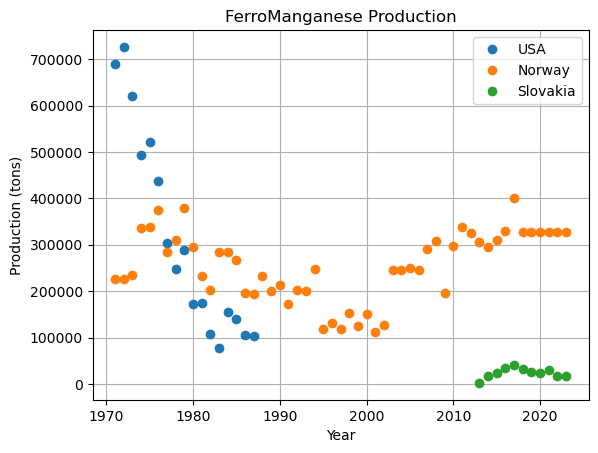

In [12]:
for country in ['USA', 'Norway', 'Slovakia']:
    df2 = df[(df['Country'] == country) & (df['Sub-commodity'] == 'Ferro-manganese')]
    plt.plot(df2['Year'], df2['Production'], 'o', label=country)
plt.xlabel('Year')
plt.ylabel('Production (tons)')
plt.title('FerroManganese Production')
plt.grid(True)
plt.legend()

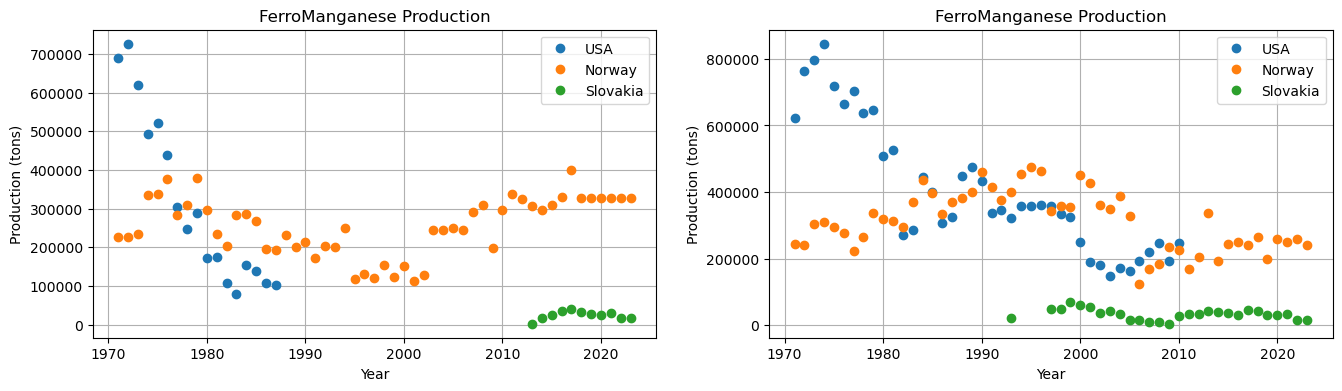

In [13]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(16,4))

for country in ['USA', 'Norway', 'Slovakia']:
    df2 = df[(df['Country'] == country) & (df['Sub-commodity'] == 'Ferro-manganese')]
    ax[0].plot(df2['Year'], df2['Production'], 'o', label=country)
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Production (tons)')
ax[0].set_title('FerroManganese Production')
ax[0].grid(True)
ax[0].legend()

for country in ['USA', 'Norway', 'Slovakia']:
    df2 = df[(df['Country'] == country) & (df['Sub-commodity'] == 'Ferro-silicon')]
    ax[1].plot(df2['Year'], df2['Production'], 'o', label=country)
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Production (tons)')
ax[1].set_title('FerroManganese Production')
ax[1].grid(True)
ax[1].legend()

* adjust better units
* fix common y-axis
* add the line (sort)
* add one more sub-commodity and redo plotting even more general

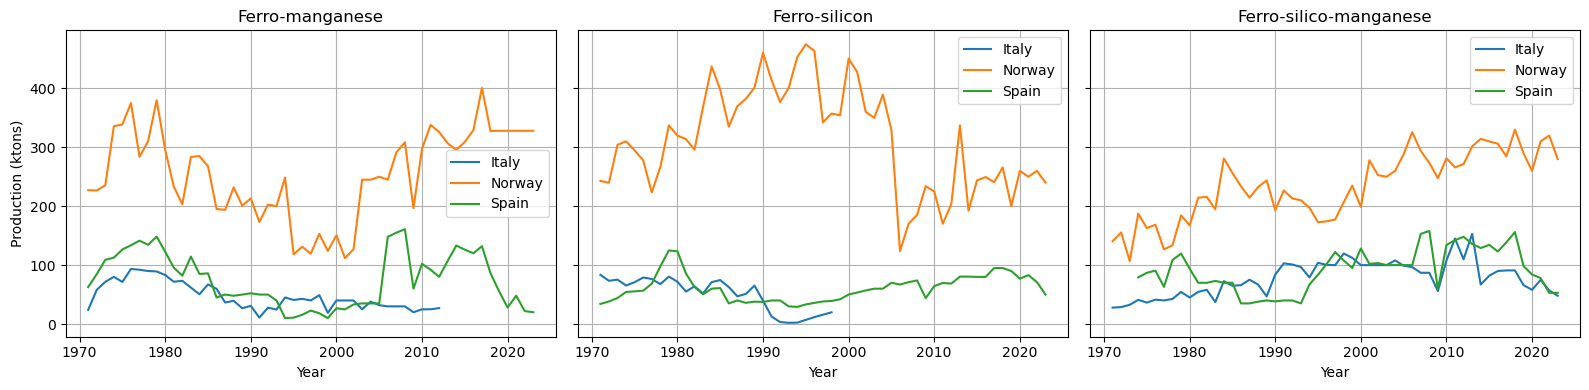

In [14]:
countries = ['Italy', 'Norway', 'Spain']
commodities = ['Ferro-manganese', 'Ferro-silicon', 'Ferro-silico-manganese']

fig, ax = plt.subplots(nrows=1, ncols=len(commodities), figsize=(16,4), sharey=True)

for i, commodity in enumerate(commodities):
    for country in countries:
        df2 = df[(df['Country'] == country) & (df['Sub-commodity'] == commodity)].sort_values(by='Year')
        ax[i].plot(df2['Year'], df2['Production']/1000, '-', label=country)
    ax[i].set_xlabel('Year')
    ax[i].set_title(commodity)
    ax[i].grid(True)
    ax[i].legend()
ax[0].set_ylabel('Production (ktons)')
plt.tight_layout()

## Covariance and Correlation

* choose one commodity and five countries
* calculate the covariance and correlation matrix
* visualize it

#### Covariance

Covariance measures how two variables change together. For variables \(X\) and \(Y\), the sample covariance is:

$$
\text{Cov}(X, Y) = \frac{1}{n-1} \sum_{i=1}^n (X_i - \bar{X})(Y_i - \bar{Y})
$$


where $ \bar{X} $ and $ \bar{Y} $ are sample means. 

A **covariance matrix** summarizes covariances between pairs of variables in a dataset as

$$
\mathbf{Cov}(X) =
\begin{pmatrix}
\text{Cov}(X_1, X_1) & \text{Cov}(X_1, X_2) & \cdots & \text{Cov}(X_1, X_n) \\
\text{Cov}(X_2, X_1) & \text{Cov}(X_2, X_2) & \cdots & \text{Cov}(X_2, X_n) \\
\vdots & \vdots & \ddots & \vdots \\
\text{Cov}(X_n, X_1) & \text{Cov}(X_n, X_2) & \cdots & \text{Cov}(X_n, X_n) \\
\end{pmatrix}
$$

##### Where Is the Covariance Matrix Typically Used?
* is a measure for how strong the linear relationship between two variables is
* one of the main ingredients for finding the linear "fit" - the regression line - in a closed form solution
* estimates **redundancy** - if $X_1$ is a linear function of $X_2$, it does not add any new information - is redundant
* this belongs to **PCA** (principal component analysis)
* to do **dimensionality reduction** - belongs to **unsupervised machine learning**
* is affected by variable scales/units - difficult to interpret of how strong the dependecy is

#### Correlation

The **correlation coefficient** $ \rho_{X,Y} $ provides a normalized, dimensionless measure of linear association:

$$
\rho_{X,Y} = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}
$$

where $ \sigma_X $ and $ \sigma_Y $ are the standard deviations of $X$ and $Y$. 

A **correlation matrix** replaces each covariance with the corresponding correlation coefficient, ranging from -1 (perfect negative) to 1 (perfect positive correlation):

$$
\mathbf{Corr}(X) =
\begin{pmatrix}
\rho_{X_1, X_1} & \rho_{X_1, X_2} & \cdots & \rho_{X_1, X_n} \\
\rho_{X_2, X_1} & \rho_{X_2, X_2} & \cdots & \rho_{X_2, X_n} \\
\vdots & \vdots & \ddots & \vdots \\
\rho_{X_n, X_1} & \rho_{X_n, X_2} & \cdots & \rho_{X_n, X_n} \\
\end{pmatrix}
$$


* correlation is unitless (normalized)
* the matrix is symmetric (as well as the covariance matrix)
* +1  means perfect positive linear correlation
* -1  means perfect negative linear correlation
* 0  variables are uncorrelated

In [15]:
countries = ["Italy", "Norway", "Mexico", "India", "Spain"]
df1 = df[(df['Country'].isin(countries)) & (df['Sub-commodity'] == 'Ferro-silico-manganese')][['Country','Year', 'Production']]

In [16]:
df1

Country  Year  Production
28    Norway  1984    280953.0
52     India  1985     13544.0
53     Italy  1985     64858.0
97     Spain  1986     35000.0
137    Spain  1987     35000.0
...      ...   ...         ...
7899   India  2022    344000.0
7901   Italy  2022     57000.0
7919   India  2023    353595.0
7921   Italy  2023     48000.0
7924  Norway  2023    280000.0

[257 rows x 3 columns]

In [17]:
df2 = pd.pivot_table(df1, index='Year', columns='Country', values='Production')

In [18]:
df2

Country      India     Italy    Mexico    Norway     Spain
Year                                                      
1971           NaN   27818.0    5991.0  140560.0       NaN
1972           NaN   28798.0   11929.0  155449.0       NaN
1973           NaN   32633.0   12306.0  106825.0       NaN
1974           NaN   41100.0   14351.0  187443.0   79241.0
1975           NaN   36289.0   15720.0  162860.0   86944.0
1976        4689.0   41386.0   17580.0  168476.0   90610.0
1977       10240.0   40050.0   26911.0  126694.0   63070.0
1978        2891.0   42615.0   33735.0  133647.0  108685.0
1979        5282.0   54513.0   31037.0  184415.0  119570.0
1980       12525.0   44914.0   30544.0  167490.0   94047.0
1981       16190.0   54563.0   25694.0  214534.0   70007.0
1982       14213.0   58118.0   31850.0  215732.0   69933.0
1983       10946.0   37244.0   41935.0  194784.0   73224.0
1984        4673.0   72779.0   41662.0  280953.0   70000.0
1985       13544.0   64858.0   39277.0  256457.0   70000.0
1986       24782.0   66083.0   60532.0  233490.0   35000.0
1987       37504.0   75192.0   80123.0  214456.0   35000.0
1988       52895.0   66959.0   80223.0  232465.0   38000.0
1989       75469.0   46868.0   98852.0  243816.0   40000.0
1990       60426.0   84000.0   70685.0  193411.0   38440.0
1991       75000.0  103000.0   67090.0  226737.0   40000.0
1992      106000.0  101000.0   57456.0  213106.0   40000.0
1993      113000.0   96743.0   62828.0  210000.0   35000.0
1994      172000.0   79068.0   72094.0  197328.0   67309.0
1995      188000.0  103961.0   67713.0  172691.0   83671.0
1996      175000.0  100353.0   92611.0  174273.0  101840.0
1997      200000.0  100000.0  105381.0  177409.0  122199.0
1998      193000.0  119675.0  104650.0  206749.0  107952.0
1999      232611.0  112358.0  113916.0  235000.0   95000.0
2000      276008.0  100000.0  107922.0  198671.0  128197.0
2001      235730.0  100000.0   74290.0  277938.0  102110.0
2002      304212.0  100000.0   73263.0  252723.0  103494.0
2003      380316.0  100000.0   81223.0  250000.0  100000.0
2004      498047.0  108000.0  103206.0  260000.0  100000.0
2005      596372.0   99000.0  104780.0  288137.0  100000.0
2006      782962.0   96600.0   97457.0  325708.0  100000.0
2007      911402.0   87000.0  109286.0  293699.0  153000.0
2008      891458.0   87000.0  114320.0  273485.0  158000.0
2009     1116047.0   56000.0   85065.0  247615.0   59200.0
2010     1242139.0  108000.0  134470.0  281266.0  134200.0
2011      201066.0  145000.0  139047.0  266000.0  142300.0
2012      236541.0  110000.0  161221.0  271400.0  148100.0
2013      225395.0  153000.0  157855.0  301400.0  136000.0
2014      249691.0   67000.0  164852.0  314300.0  129000.0
2015      269920.0   82000.0  139363.0  309900.0  134400.0
2016      300625.0   90000.0  134251.0  306100.0  123100.0
2017      311326.0   91000.0  148142.0  284500.0  138700.0
2018      342591.0   91000.0  151991.0  330000.0  156100.0
2019      320594.0   66000.0  154209.0  290000.0   98400.0
2020      329295.0   58000.0  147784.0  260000.0   84000.0
2021      349414.0   75000.0  170929.0  310000.0   78000.0
2022      344000.0   57000.0  175396.0  320000.0   53000.0
2023      353595.0   48000.0  148835.0  280000.0   53000.0

In [19]:
df2_clean = df2.dropna()/1000 # into ktonnes

In [20]:
df2_clean.cov()

Country         India        Italy       Mexico       Norway        Spain
Country                                                                  
India    84775.856332  1998.377512  5942.454697  7672.861289  4361.089744
Italy     1998.377512   720.328318   491.738260   407.493102   421.609007
Mexico    5942.454697   491.738260  2069.763512  1749.914156   746.709515
Norway    7672.861289   407.493102  1749.914156  2727.102189   652.298708
Spain     4361.089744   421.609007   746.709515   652.298708  1359.178131

In [21]:
df2_clean.corr()

Country     India     Italy    Mexico    Norway     Spain
Country                                                  
India    1.000000  0.255727  0.448610  0.504627  0.406276
Italy    0.255727  1.000000  0.402725  0.290740  0.426095
Mexico   0.448610  0.402725  1.000000  0.736556  0.445198
Norway   0.504627  0.290740  0.736556  1.000000  0.338811
Spain    0.406276  0.426095  0.445198  0.338811  1.000000

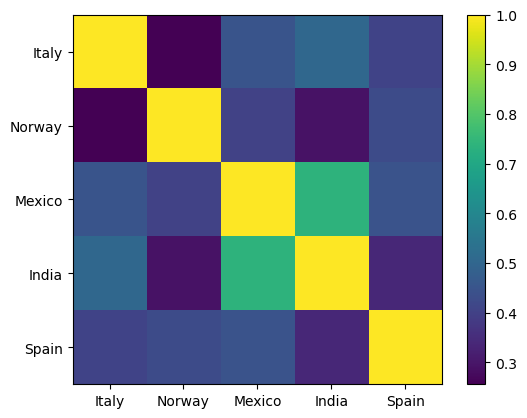

In [22]:
plt.xticks(ticks=[0,1,2,3,4], labels=countries)
plt.yticks(ticks=[0,1,2,3,4], labels=countries)
im = plt.imshow(df2_clean.corr())   # vmin=-1, vmax=1
plt.colorbar(im)

Text(0.5, 1.01, 'Scatter Matrix: Ferro-silico-manganese Production for 5 Countries')

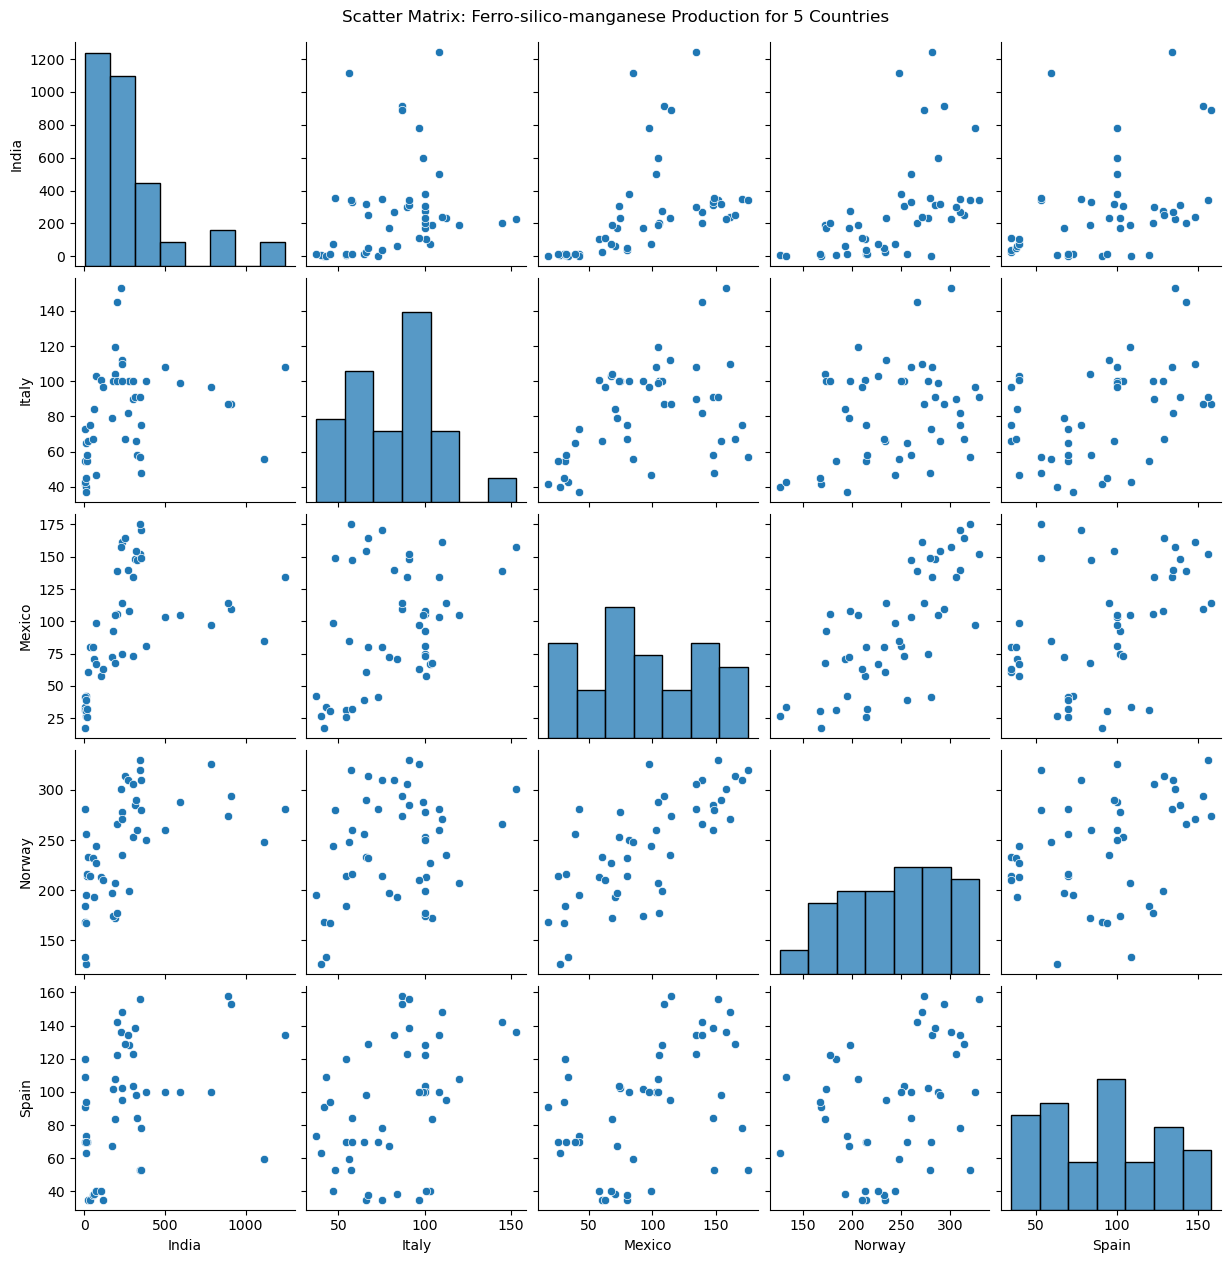

In [23]:
# Scatter matrix (pairplot)
sns.pairplot(df2_clean)   # diag_kind='kde'
plt.suptitle('Scatter Matrix: Ferro-silico-manganese Production for 5 Countries', y=1.01)

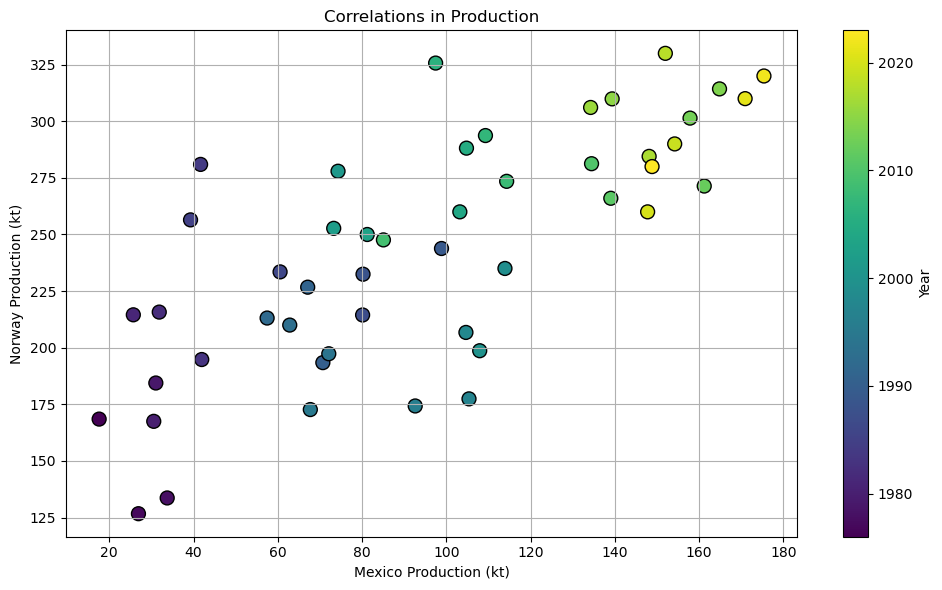

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(df2_clean['Mexico'], df2_clean['Norway'], s=100, c=df2_clean.index, cmap='viridis', edgecolors='black')
plt.colorbar(label='Year')
plt.xlabel('Mexico Production (kt)')
plt.ylabel('Norway Production (kt)')
plt.title('Correlations in Production')
plt.grid(True)
plt.tight_layout()

## Exploratory Data Analysis

*Exploratory data analysis is an attitude, a state of flexibility, \
a willingness to look for those things that we believe are not there, \
as well as those we believe to be there.*

John Tukey (1915–2000)

American mathematician and statistician

* how does my data look like?
* which region they cover?
* are any data missing? NANs?
* do we have outliers?
* are there any patterns?
* are data clustered around a certain point?
* are there any correlations between variables?

#### 1. Descriptive statistics - measures of
   * frequency ("25% of all my data for the first attribute are less than zero")
   * the central tendency (**mean** ($1^{th}$ raw moment), **median**, the mode (*uni-, bi-, multi-modal*))
   * dispersion or the variability (**variance** ($2^{th}$ central moment), **standard deviation** **min** and **max**)
   * measures of the shape (asymmetric data? -> **skewness** ($3^{th}$ central moment), fat tail? -> **kurtosis** ($4^{th}$ central moment))
   * measures of the dependency of variables (**correlation**)

#### Data Visualization
   * must complement the above!
   * *Anscombe’s quartet* -> a very educative example by the statistician F. ANSCOMBE from 1973

In [25]:
df = pd.read_csv('anscombe_quartet.csv')

In [26]:
df.mean()

x1    9.000000
y1    7.500909
x2    9.000000
y2    7.500909
x3    9.000000
y3    7.500000
x4    9.000000
y4    7.500909
dtype: float64

In [27]:
df.cov()

x1        y1      x2        y2      x3       y3      x4        y4
x1  11.000  5.501000  11.000  5.500000  11.000  5.49700  -5.500 -2.115000
y1   5.501  4.127269   5.501  3.095609   5.501  1.93343  -3.565 -2.017731
x2  11.000  5.501000  11.000  5.500000  11.000  5.49700  -5.500 -2.115000
y2   5.500  3.095609   5.500  4.127629   5.500  2.42524  -4.841 -1.972351
x3  11.000  5.501000  11.000  5.500000  11.000  5.49700  -5.500 -2.115000
y3   5.497  1.933430   5.497  2.425240   5.497  4.12262  -2.321 -0.641000
x4  -5.500 -3.565000  -5.500 -4.841000  -5.500 -2.32100  11.000  5.499000
y4  -2.115 -2.017731  -2.115 -1.972351  -2.115 -0.64100   5.499  4.123249

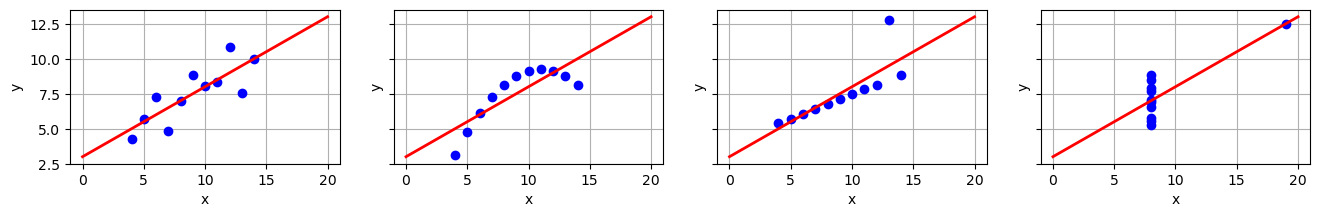

In [28]:
fig, axes = plt.subplots(1, 4, figsize=(16, 2), sharex=True, sharey=True)

for i, ax in enumerate(axes):
    x = df[f'x{i+1}']
    y = df[f'y{i+1}']
    # Scatter plot
    ax.plot(x, y, 'bo')
    slope, intercept = np.polyfit(x, y, 1)
    xfit = np.linspace(0, 20, 100)
    ax.plot(xfit, intercept + slope * xfit, color='red', lw=2)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid()

    # print('No. of observations of X and Y: ', len(x), len(y))
    # print('Mean of X and Y: ', round(np.mean(x),2), round(np.mean(y),2))
    # print("Sample variance of X and Y: %.2f %.2f" % (np.var(x,ddof=1), np.var(y,ddof=1)))
    # print('Correlation between X and Y:  {:.2f}'.format(np.var(y),2))
    # print(f'Slope and intercept: {slope:.2f}, {intercept:.2f}')

* each of them has $n = 11$ observations
* the mean of each X is exactly $\bar{x} = 9$
* the mean of each Y is $\bar{y} = 7.5$
* the sample variance of each X is exactly $\sigma_X = 11$
* the sample variance of each Y is $\sigma_Y = 4.13$
* the correlation coefficient between any pair of X and Y is Cor$(X,Y) = 0.82$
* fitting a line to the data always gives the equation $Y = 0.5 X + 3.0$

### Datasaurus dozen

Similar to Anscombe's quartet, the Datasaurus dozen was designed to further illustrate the importance of looking at a set of data graphically before starting to analyze according to a particular type of relationship, and the inadequacy of basic statistic properties for describing realistic data sets.

![datasaurus1.jpg](datasaurus1.jpg)

---
## Part 2: Data filtering, differentiation and integration

### Dataset 2: Solidification of Aluminium - a thermocouple data 

The info on the txt file:
* first raw - the total time $T_{max}$
* followed by rows containing voltage in (V) for times between 0 and $T_{max}$
* the conversion voltage (V) -> temperature (C) is as: $T=V\cdot 275.5 - 79$ 

In [30]:
df = pd.read_csv('thermocouple_data.txt')

In [31]:
df

511.00
0    2.563894
1    2.561174
2    2.558453
3    2.555733
4    2.553049
..        ...
845  1.713767
846  1.712715
847  1.711627
848  1.710793
849  1.709705

[850 rows x 1 columns]

In [32]:
data = np.loadtxt('thermocouple_data.txt')

In [33]:
Tmax = data[0]
V = data[1:]
t = np.linspace(0,Tmax,len(V))
T = V*275.5 - 79

Text(0, 0.5, 'Temperature (C)')

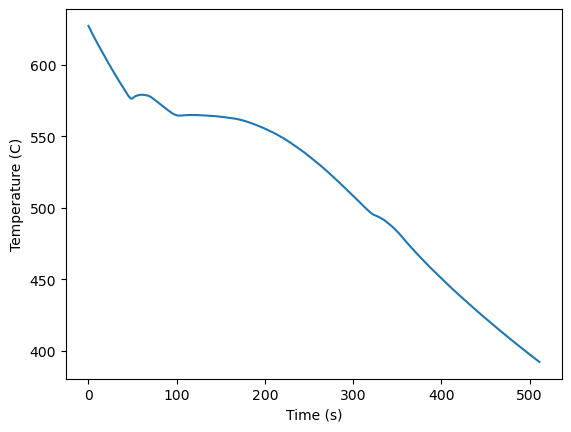

In [34]:
plt.plot(t,T)
plt.xlabel('Time (s)')
plt.ylabel('Temperature (C)')

<Axes: ylabel='Count'>

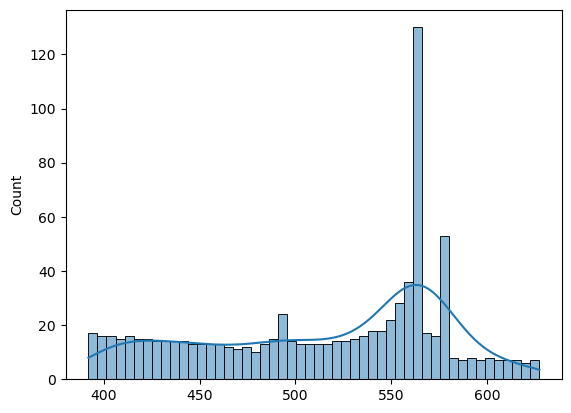

In [35]:
sns.histplot(T,bins=50,kde=True)

<Axes: ylabel='Density'>

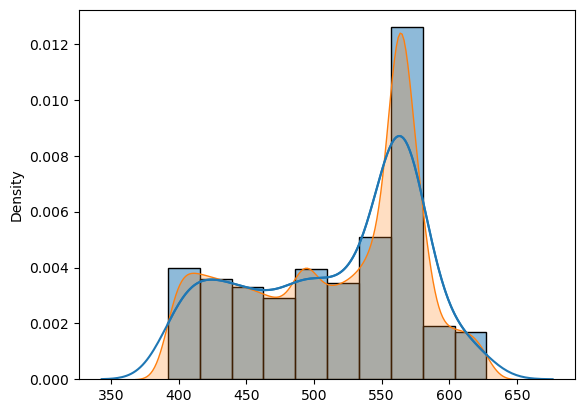

In [36]:
sns.histplot(T, bins=10, stat='density', kde=True)
sns.kdeplot(T, bw_adjust=0.5, fill=True)
# sns.kdeplot(T, bw_adjust=2)
sns.kdeplot(T, bw_method='scott')

In [37]:
dTdt = np.diff(T)/np.diff(t)

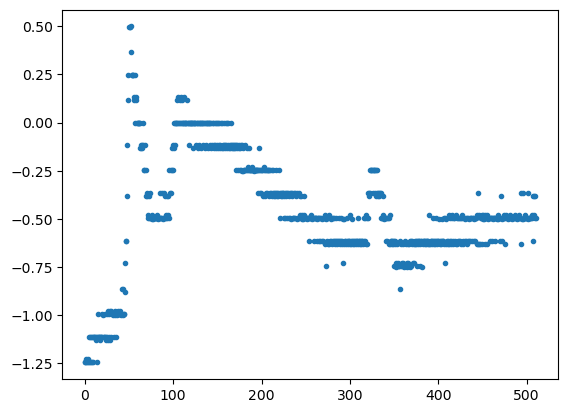

In [38]:
plt.plot(t[:-1],dTdt,'.')

### Savitzky-Golay filter (1964)$^1$.

The Savitzky-Golay filter is a digital filter used for smoothing noisy data while preserving the shape and height of signal features such as peaks and valleys. 

[1]: Savitzky, A. & Golay, M. J. E. (1964). "Smoothing and Differentiation of Data by Simplified Least Squares Procedures." *Analytical Chemistry*, 36(8), 1627–1639. [https://doi.org/10.1021/ac60214a047](https://doi.org/10.1021/ac60214a047)

### How it works:
* For each data point, a window of neighboring values is selected (window size, e.g. 5, 7, or more).
* A polynomial of a chosen degree (commonly 2 or 3) is least-squares fitted to all points in the window.
* The center point is replaced with the polynomial value at that location.
* The window slides over the entire data series, repeating the process for every data point.

### Advantages:
* Preserves important features (like peak width and height) better than standard moving averages.
* Can be tuned for different types of noise and signal shapes by choosing the window size and polynomial degree.
* Calculating smoothed derivatives of a signal (by evaluating derivatives of the fitted polynomial).

![savgol.jpg](savgol.jpg)

The Savitzky-Golay smoothing equation for a cubic (third-order) polynomial over a 7-point window is:

$$\tilde{y}_n = \frac{-2y_{n-3} + 3y_{n-2} + 6y_{n-1} + 7y_{n} + 6y_{n+1} + 3y_{n+2} - 2y_{n+3}}{21}$$


In [39]:
import scipy.signal as ss 
ss.savgol_coeffs(7, 3) #*21

array([-0.0952381 ,  0.14285714,  0.28571429,  0.33333333,  0.28571429,
        0.14285714, -0.0952381 ])

In [42]:
WL, P = 13, 2 

Tf = ss.savgol_filter(T, WL, P)
dTdt2 = ss.savgol_filter(T, window_length=2, polyorder=1, deriv=1)
dTdtf = ss.savgol_filter(T, window_length=WL, polyorder=P, deriv=1)

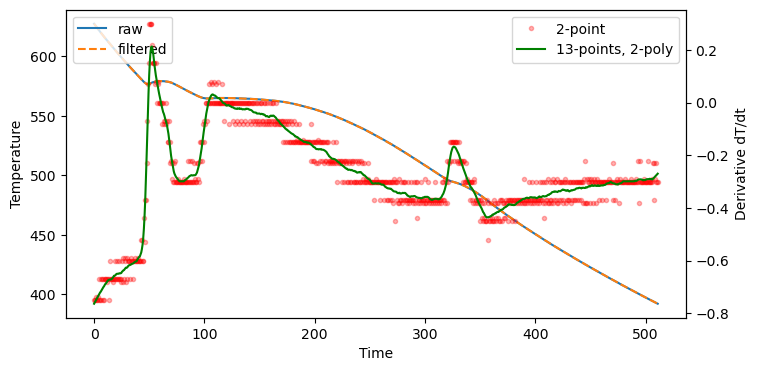

In [45]:
fig, ax1 = plt.subplots(figsize=(8, 4))
ax1.plot(t,T, label='raw')
ax1.plot(t,Tf,'--', label='filtered',alpha=1)
ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature')
ax1.legend(loc='upper left')
#
ax2 = ax1.twinx()
ax2.plot(t, dTdt2, '.r', label='2-point', alpha=0.3)
ax2.plot(t, dTdtf, 'g', label=f'{WL}-points, {P}-poly')
ax2.set_ylabel('Derivative dT/dt')
ax2.legend(loc='upper right')

---
## Part 3: Linear and Non-Linear Regression

### 3.1 Linear Regression

In [75]:
p_flat

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.3, 0.3, 0.3, 0.3, 0.3, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.7, 0.7, 0.7, 0.7, 0.7, 1. , 1. , 1. , 1. , 1. ])

In [74]:
r_meas

array([0.00251278, 0.00646595, 0.01750041, 0.03984515, 0.07163305,
       0.00133594, 0.00396305, 0.00958447, 0.02195288, 0.0438733 ,
       0.00115555, 0.00316889, 0.00756828, 0.01797814, 0.03632797,
       0.0008953 , 0.00262548, 0.00606966, 0.01501538, 0.02992655,
       0.00077545, 0.00208343, 0.00566002, 0.01194121, 0.02456344])

In [ ]:
r = [0.00077545, 0.00208343, 0.00566002, 0.01194121, 0.02456344]

Generated kinetic data (first 10 rows):
    T_K  p_CO_bar  rate_meas
0  1673       0.1   0.002513
1  1773       0.1   0.006466
2  1873       0.1   0.017500
3  1973       0.1   0.039845
4  2073       0.1   0.071633
5  1673       0.3   0.001336
6  1773       0.3   0.003963
7  1873       0.3   0.009584
8  1973       0.3   0.021953
9  2073       0.3   0.043873

Total data points: 25


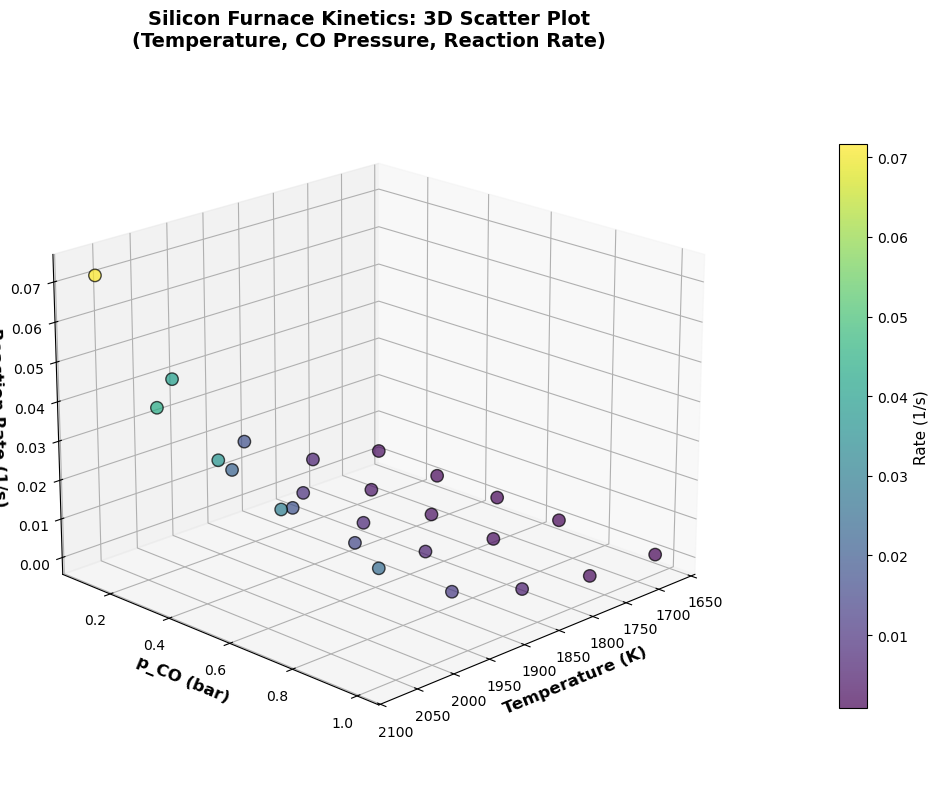

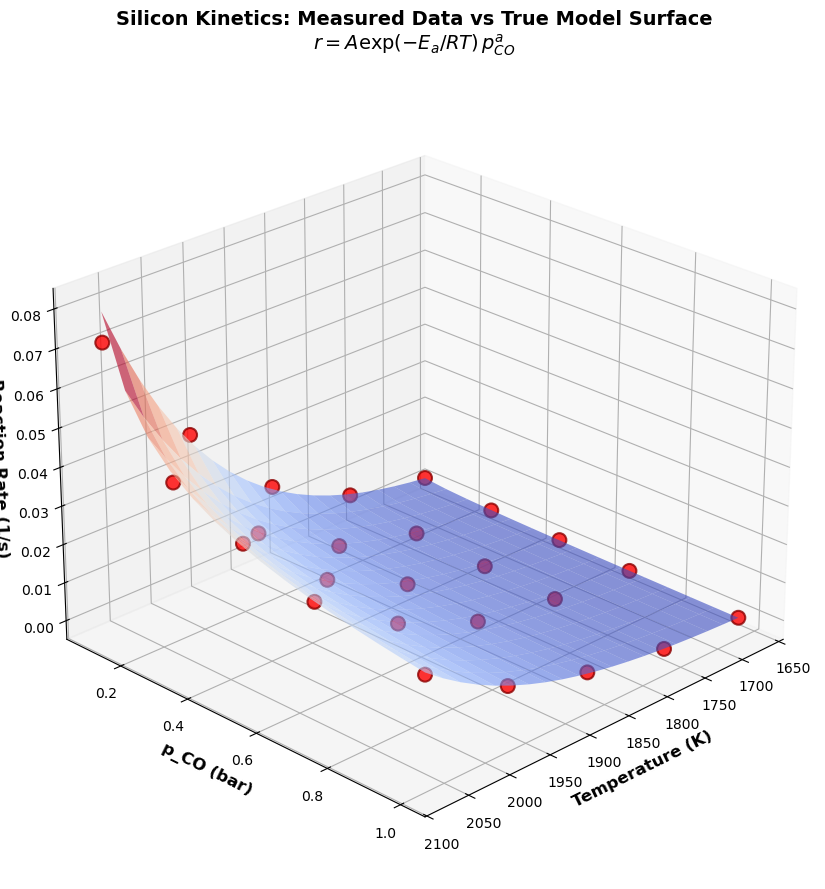


✓ 3D plots generated successfully!


In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.constants import R

# ============================================================================
# GENERATE SYNTHETIC DATA: Arrhenius rate law with CO dependence
# ============================================================================

# True parameters (silica-carbon reduction kinetics)
A_true = 5.0e4       # 1/s, pre-exponential factor
Ea_true = 250e3      # J/mol, activation energy
a_true = -0.5        # reaction order in CO (negative = inhibiting)

# Experimental conditions
T_K = np.array([1673, 1773, 1873, 1973, 2073])  # Kelvin
p_CO = np.array([0.1, 0.3, 0.5, 0.7, 1.0])      # bar

# Create mesh grid of all T, p_CO combinations
T_grid, p_grid = np.meshgrid(T_K, p_CO)
T_flat = T_grid.flatten()
p_flat = p_grid.flatten()

# Ideal reaction rate from Arrhenius model
r_ideal = A_true * np.exp(-Ea_true / (R * T_flat)) * (p_flat ** a_true)

# Add ~5% multiplicative Gaussian noise (experimental scatter)
rng = np.random.default_rng(seed=42)
noise = rng.normal(loc=0.0, scale=0.05, size=r_ideal.size)
r_meas = r_ideal * (1.0 + noise)

# Assemble into pandas DataFrame
df = pd.DataFrame({
    "T_K": T_flat,
    "p_CO_bar": p_flat,
    "rate_meas": r_meas
})

print("Generated kinetic data (first 10 rows):")
print(df.head(10))
print(f"\nTotal data points: {len(df)}")

# ============================================================================
# 3D SCATTER PLOT
# ============================================================================

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot: T_K (x), p_CO (y), rate (z)
scatter = ax.scatter(df['T_K'], df['p_CO_bar'], df['rate_meas'],
                     c=df['rate_meas'], cmap='viridis', s=80, edgecolor='black', alpha=0.7)

# Labels
ax.set_xlabel('Temperature (K)', fontsize=12, fontweight='bold')
ax.set_ylabel('p_CO (bar)', fontsize=12, fontweight='bold')
ax.set_zlabel('Reaction Rate (1/s)', fontsize=12, fontweight='bold')
ax.set_title('Silicon Furnace Kinetics: 3D Scatter Plot\n(Temperature, CO Pressure, Reaction Rate)', 
             fontsize=14, fontweight='bold', pad=20)

# Colorbar
cbar = plt.colorbar(scatter, ax=ax, pad=0.1, shrink=0.8)
cbar.set_label('Rate (1/s)', fontsize=11)

# Viewing angle
ax.view_init(elev=20, azim=45)

plt.tight_layout()
plt.show()

# ============================================================================
# Optional: Plot with fitted surface overlay
# ============================================================================

# Create a dense mesh for the fitted surface
T_surf = np.linspace(1673, 2073, 20)
p_surf = np.linspace(0.1, 1.0, 15)
T_mesh, p_mesh = np.meshgrid(T_surf, p_surf)
r_surf = A_true * np.exp(-Ea_true / (R * T_mesh)) * (p_mesh ** a_true)

fig2 = plt.figure(figsize=(14, 9))
ax2 = fig2.add_subplot(111, projection='3d')

# Measured data as scatter
ax2.scatter(df['T_K'], df['p_CO_bar'], df['rate_meas'],
            c='red', s=100, marker='o', edgecolor='darkred', linewidth=1.5,
            label='Measured data', alpha=0.8)

# Theoretical surface
ax2.plot_surface(T_mesh, p_mesh, r_surf, alpha=0.6, cmap='coolwarm', 
                 edgecolor='none', label='True model surface')

ax2.set_xlabel('Temperature (K)', fontsize=12, fontweight='bold')
ax2.set_ylabel('p_CO (bar)', fontsize=12, fontweight='bold')
ax2.set_zlabel('Reaction Rate (1/s)', fontsize=12, fontweight='bold')
ax2.set_title('Silicon Kinetics: Measured Data vs True Model Surface\n' + 
              r'$r = A \exp(-E_a/RT) \, p_{CO}^a$',
              fontsize=14, fontweight='bold', pad=20)

ax2.view_init(elev=25, azim=45)
plt.tight_layout()
plt.show()

print("\n✓ 3D plots generated successfully!")


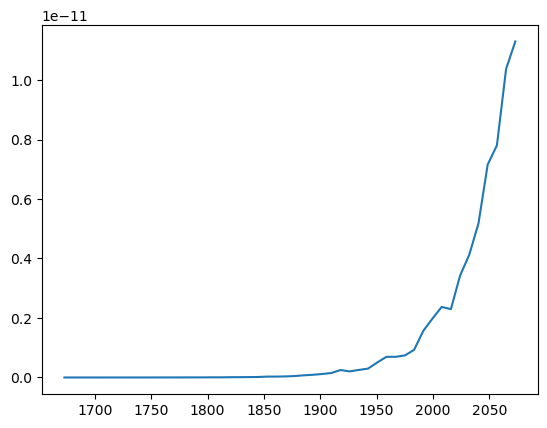

In [68]:
import numpy as np
import pandas as pd
from scipy.constants import R  # molar gas constant, J/(mol*K)

# --- true Arrhenius parameters (silica reduction kinetics, illustrative) ---
A_true = 5.0e4          # 1/s, pre-exponential factor
Ea_true = 180e3         # J/mol, activation energy (250 kJ/mol)
n = -0.3
beta = 1.5
# --- temperature grid (typical silicon furnace / lab TGA conditions) ---
T_K = np.linspace(1673, 2073, 50)  # Kelvin

# --- ideal Arrhenius rate constants (noise-free) ---
k_ideal = A_true * T_K**n * np.exp(-(Ea_true / (R * T_K))**beta)

# --- multiplicative Gaussian noise: 5% std dev on k ---
rng = np.random.default_rng(seed=42)  # for reproducibility
noise_rel = rng.normal(loc=0.0, scale=0.2, size=T_K.size)  # 5% noise
k_meas = k_ideal * (1.0 + noise_rel)
plt.plot(T_K, k_meas)

In [76]:
# Linear regression: Production vs Year
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = production_df['Year'].values.reshape(-1, 1)
y = production_df['FerroManganese_kt'].values

# Fit linear model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=80, alpha=0.6, label='Actual data', color='blue', edgecolors='black')
plt.plot(X, y_pred, 'r-', linewidth=3, label=f'Linear fit (R² = {r2_score(y, y_pred):.3f})')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('FerroManganese Production (kt)', fontsize=12, fontweight='bold')
plt.title('Linear Regression: FerroManganese Production Trend', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f'Slope: {model.coef_[0]:.2f} kt/year')
print(f'Intercept: {model.intercept_:.2f} kt')
print(f'R² Score: {r2_score(y, y_pred):.4f}')

NameError: name 'production_df' is not defined

### 3.2 Non-Linear Regression: Arrhenius Equation

The Arrhenius equation describes the temperature dependence of reaction rates:  
$$k = A \cdot e^{-E_a / RT}$$

For metallurgical processes, extraction efficiency often follows similar behavior.

In [46]:
# Non-linear curve fitting: Arrhenius-type behavior
def arrhenius_model(T, A, Ea, C):
    """Modified Arrhenius equation for extraction efficiency"""
    R = 8.314  # J/(mol·K)
    T_kelvin = T + 273.15
    return A * np.exp(-Ea / (R * T_kelvin)) + C

# Fit the model to Basicity 2.0 data
T_data = mn_data['Temperature_C'].values
efficiency_data = mn_data['Basicity_2.0'].values

# Initial guess for parameters [A, Ea, C]
initial_guess = [1000, 50000, 20]
params, covariance = curve_fit(arrhenius_model, T_data, efficiency_data, p0=initial_guess)

# Generate smooth curve
T_smooth = np.linspace(T_data.min(), T_data.max(), 100)
efficiency_fit = arrhenius_model(T_smooth, *params)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(T_data, efficiency_data, s=100, alpha=0.7, label='Experimental data', 
           color='green', edgecolors='black', zorder=5)
plt.plot(T_smooth, efficiency_fit, 'r-', linewidth=3, 
         label=f'Arrhenius fit (Ea = {params[1]/1000:.1f} kJ/mol)', zorder=3)
plt.xlabel('Temperature (°C)', fontsize=12, fontweight='bold')
plt.ylabel('Mn Extraction Efficiency (%)', fontsize=12, fontweight='bold')
plt.title('Non-Linear Curve Fitting: Arrhenius-Type Behavior', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f'\nFitted Parameters:')
print(f'A = {params[0]:.2e}')
print(f'Ea = {params[1]/1000:.2f} kJ/mol')
print(f'C = {params[2]:.2f}')

NameError: name 'mn_data' is not defined

### 3.3 Polynomial Regression

NameError: name 'T_smooth' is not defined

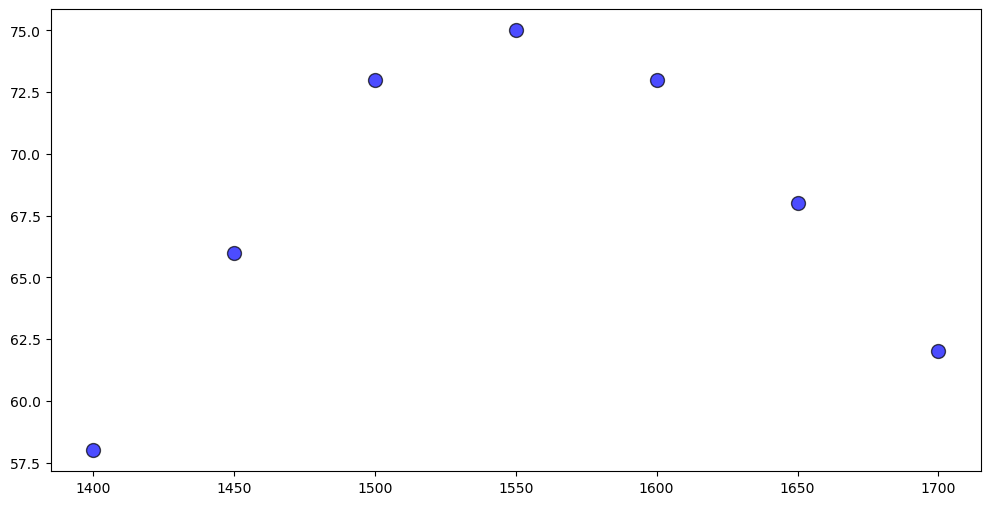

In [84]:
# Polynomial regression (degree 2 and 3)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(12, 6))

# Original data
plt.scatter(T_data, efficiency_data, s=100, alpha=0.7, label='Data', 
           color='blue', edgecolors='black', zorder=5)

# Fit polynomials of different degrees
colors = ['red', 'green', 'orange']
for degree, color in zip([1, 2, 3], colors):
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_model.fit(T_data.reshape(-1, 1), efficiency_data)
    y_poly = poly_model.predict(T_smooth.reshape(-1, 1))
    r2 = r2_score(efficiency_data, poly_model.predict(T_data.reshape(-1, 1)))
    plt.plot(T_smooth, y_poly, color=color, linewidth=2.5, 
             label=f'Polynomial degree {degree} (R² = {r2:.3f})')

plt.xlabel('Temperature (°C)', fontsize=12, fontweight='bold')
plt.ylabel('Mn Extraction Efficiency (%)', fontsize=12, fontweight='bold')
plt.title('Polynomial Regression: Comparison of Different Degrees', 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

---
## Part 4: 3D Plotting

### 4.1 3D Scatter Plot

In [85]:
# Load silicon production 3D data
si_data = pd.read_csv('silicon_production_3d_data.csv')
print(f'Silicon production data shape: {si_data.shape}')
print(si_data.head())

Silicon production data shape: (400, 3)
   Temperature_C  SiO2_wt_percent  Si_Recovery_percent
0    1700.000000              0.5            71.807571
1    1726.315789              0.5            71.287237
2    1752.631579              0.5            72.894144
3    1778.947368              0.5            74.630978
4    1805.263158              0.5            72.414871


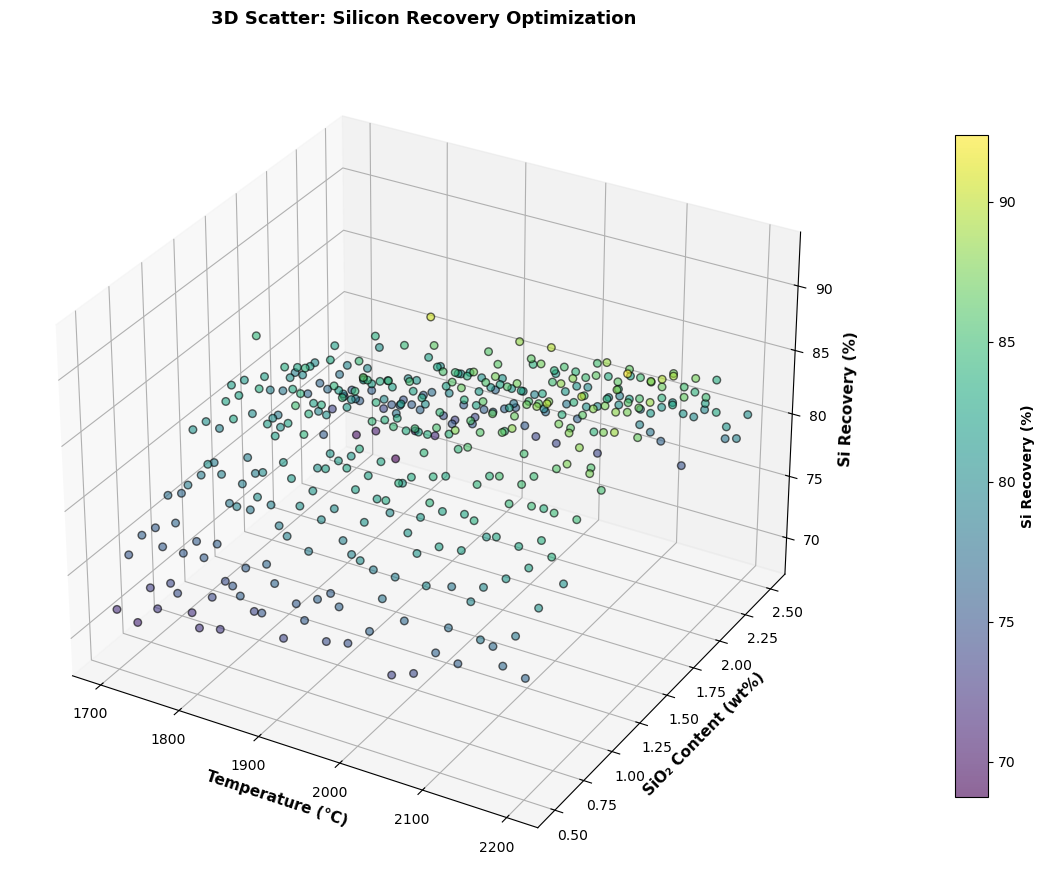

In [87]:
# 3D scatter plot
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(si_data['Temperature_C'], 
                    si_data['SiO2_wt_percent'],
                    si_data['Si_Recovery_percent'],
                    c=si_data['Si_Recovery_percent'], 
                    cmap='viridis', s=30, alpha=0.6, edgecolors='black')

ax.set_xlabel('Temperature (°C)', fontsize=11, fontweight='bold')
ax.set_ylabel('SiO₂ Content (wt%)', fontsize=11, fontweight='bold')
ax.set_zlabel('Si Recovery (%)', fontsize=11, fontweight='bold')
ax.set_title('3D Scatter: Silicon Recovery Optimization', 
             fontsize=13, fontweight='bold', pad=20)

cbar = plt.colorbar(scatter, ax=ax, pad=0.1, shrink=0.8)
cbar.set_label('Si Recovery (%)', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

### 4.2 3D Surface Plot with Regression

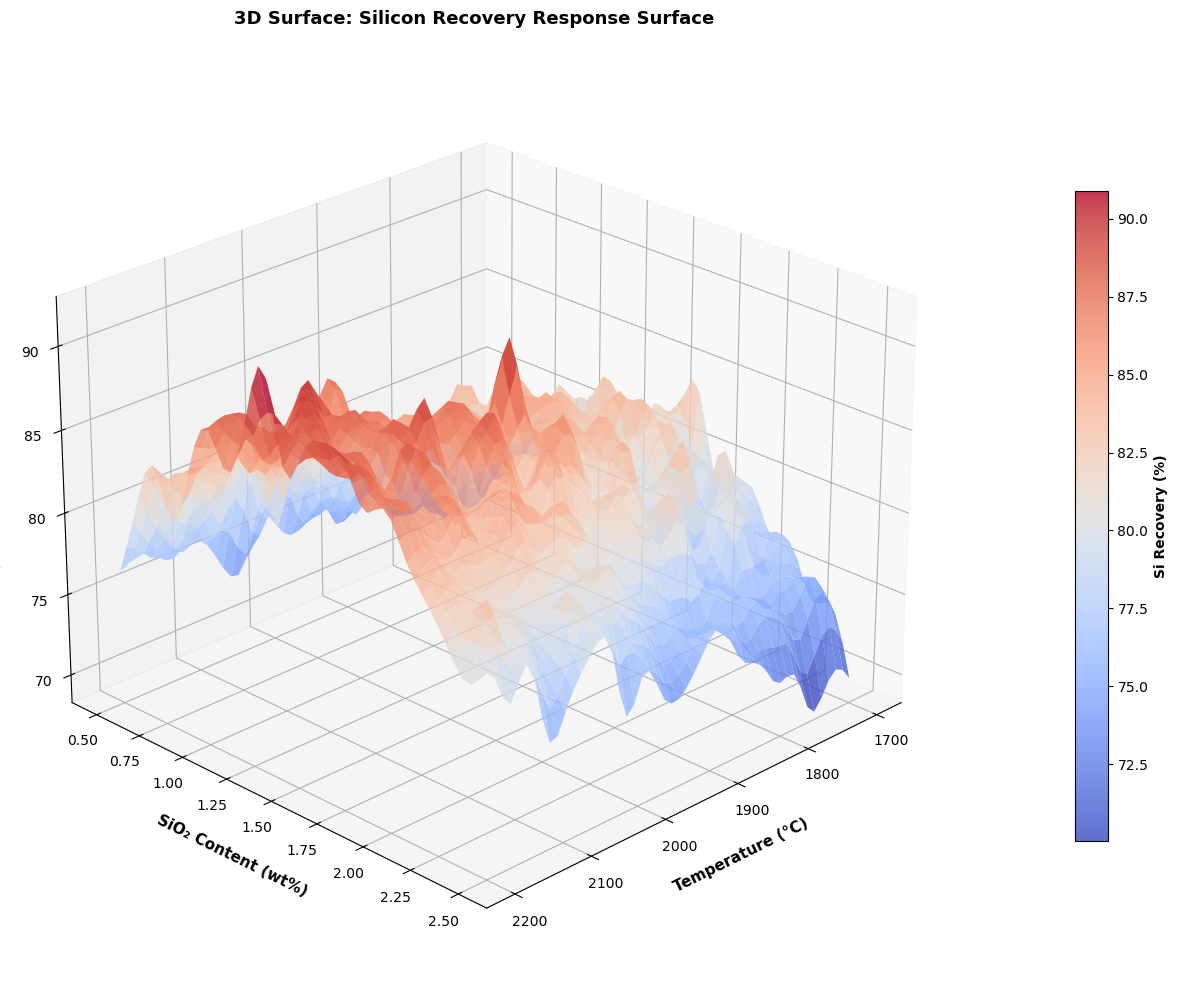

In [88]:
# Prepare grid data for surface plot
from scipy.interpolate import griddata

# Create regular grid
T_grid = np.linspace(si_data['Temperature_C'].min(), si_data['Temperature_C'].max(), 50)
SiO2_grid = np.linspace(si_data['SiO2_wt_percent'].min(), si_data['SiO2_wt_percent'].max(), 50)
T_mesh, SiO2_mesh = np.meshgrid(T_grid, SiO2_grid)

# Interpolate recovery values
Recovery_mesh = griddata(
    (si_data['Temperature_C'], si_data['SiO2_wt_percent']),
    si_data['Si_Recovery_percent'],
    (T_mesh, SiO2_mesh),
    method='cubic'
)

# 3D surface plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(T_mesh, SiO2_mesh, Recovery_mesh, 
                       cmap='coolwarm', alpha=0.8, edgecolor='none')

ax.set_xlabel('Temperature (°C)', fontsize=11, fontweight='bold', labelpad=10)
ax.set_ylabel('SiO₂ Content (wt%)', fontsize=11, fontweight='bold', labelpad=10)
ax.set_zlabel('Si Recovery (%)', fontsize=11, fontweight='bold', labelpad=10)
ax.set_title('3D Surface: Silicon Recovery Response Surface', 
             fontsize=13, fontweight='bold', pad=20)

cbar = fig.colorbar(surf, ax=ax, pad=0.1, shrink=0.7)
cbar.set_label('Si Recovery (%)', fontsize=10, fontweight='bold')

ax.view_init(elev=25, azim=45)
plt.tight_layout()
plt.show()

### 4.3 Contour Plot

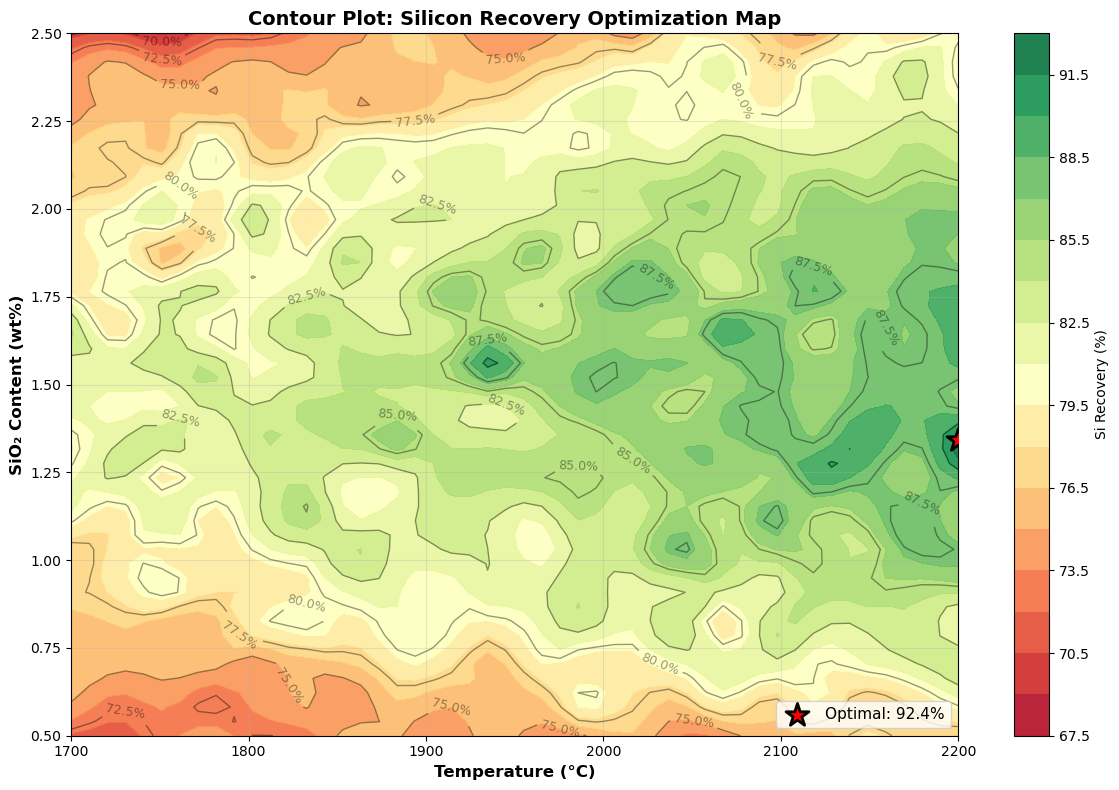

Optimal operating conditions:
  Temperature: 2200.0°C
  SiO₂ Content: 1.34 wt%
  Si Recovery: 92.4%


In [89]:
# 2D contour plot
plt.figure(figsize=(12, 8))
contour_filled = plt.contourf(T_mesh, SiO2_mesh, Recovery_mesh, 
                              levels=20, cmap='RdYlGn', alpha=0.9)
contour_lines = plt.contour(T_mesh, SiO2_mesh, Recovery_mesh, 
                            levels=10, colors='black', linewidths=1, alpha=0.4)
plt.clabel(contour_lines, inline=True, fontsize=9, fmt='%.1f%%')

# Mark optimal point
optimal_idx = si_data['Si_Recovery_percent'].idxmax()
optimal_T = si_data.loc[optimal_idx, 'Temperature_C']
optimal_SiO2 = si_data.loc[optimal_idx, 'SiO2_wt_percent']
optimal_Recovery = si_data.loc[optimal_idx, 'Si_Recovery_percent']

plt.scatter(optimal_T, optimal_SiO2, s=300, c='red', marker='*', 
           edgecolors='black', linewidths=2, zorder=10,
           label=f'Optimal: {optimal_Recovery:.1f}%')

plt.xlabel('Temperature (°C)', fontsize=12, fontweight='bold')
plt.ylabel('SiO₂ Content (wt%)', fontsize=12, fontweight='bold')
plt.title('Contour Plot: Silicon Recovery Optimization Map', 
          fontsize=14, fontweight='bold')
plt.colorbar(contour_filled, label='Si Recovery (%)')
plt.legend(fontsize=11, loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f'Optimal operating conditions:')
print(f'  Temperature: {optimal_T:.1f}°C')
print(f'  SiO₂ Content: {optimal_SiO2:.2f} wt%')
print(f'  Si Recovery: {optimal_Recovery:.1f}%')

---
## Part 5: Scientific Plotting with Error Bars

### 5.1 Error Bars and Confidence Intervals

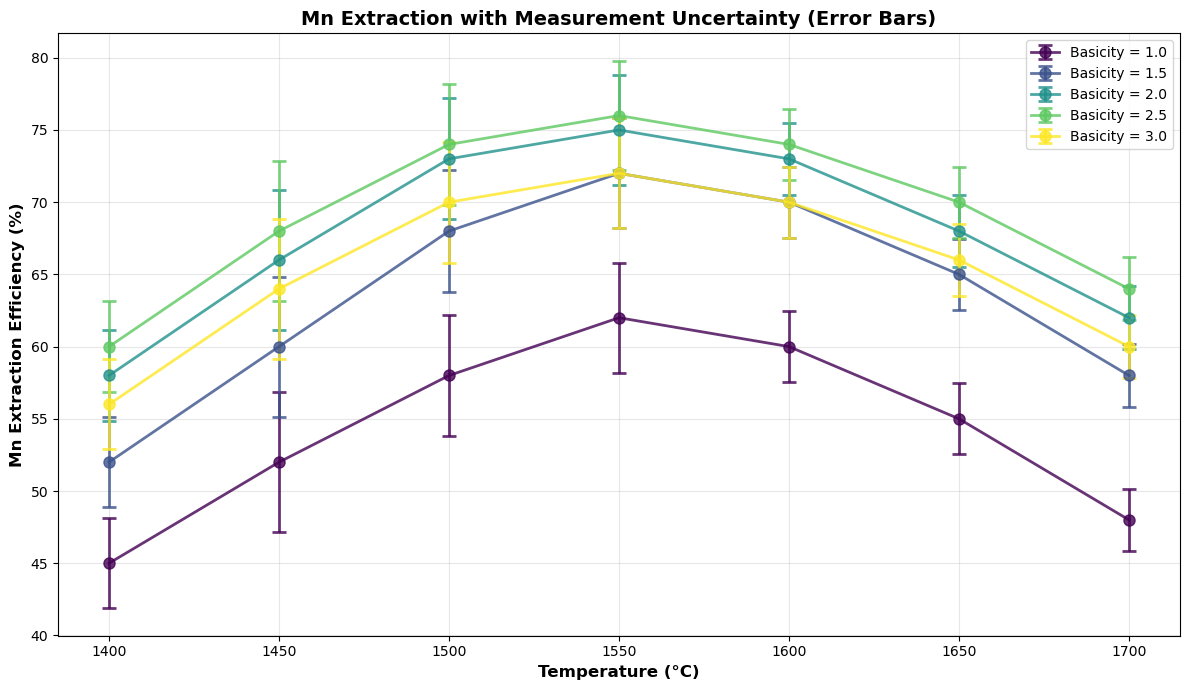

In [90]:
# Plot with error bars
plt.figure(figsize=(12, 7))

# Plot each basicity with error bars
basicities = ['Basicity_1.0', 'Basicity_1.5', 'Basicity_2.0', 'Basicity_2.5', 'Basicity_3.0']
colors = plt.cm.viridis(np.linspace(0, 1, len(basicities)))

for i, (bas, color) in enumerate(zip(basicities, colors)):
    plt.errorbar(mn_data['Temperature_C'], mn_data[bas], 
                yerr=mn_data['Error_±'],
                marker='o', markersize=8, linewidth=2, capsize=5, capthick=2,
                color=color, label=bas.replace('_', ' = '), alpha=0.8)

plt.xlabel('Temperature (°C)', fontsize=12, fontweight='bold')
plt.ylabel('Mn Extraction Efficiency (%)', fontsize=12, fontweight='bold')
plt.title('Mn Extraction with Measurement Uncertainty (Error Bars)', 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=10, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 5.2 Confidence Intervals and Shaded Regions

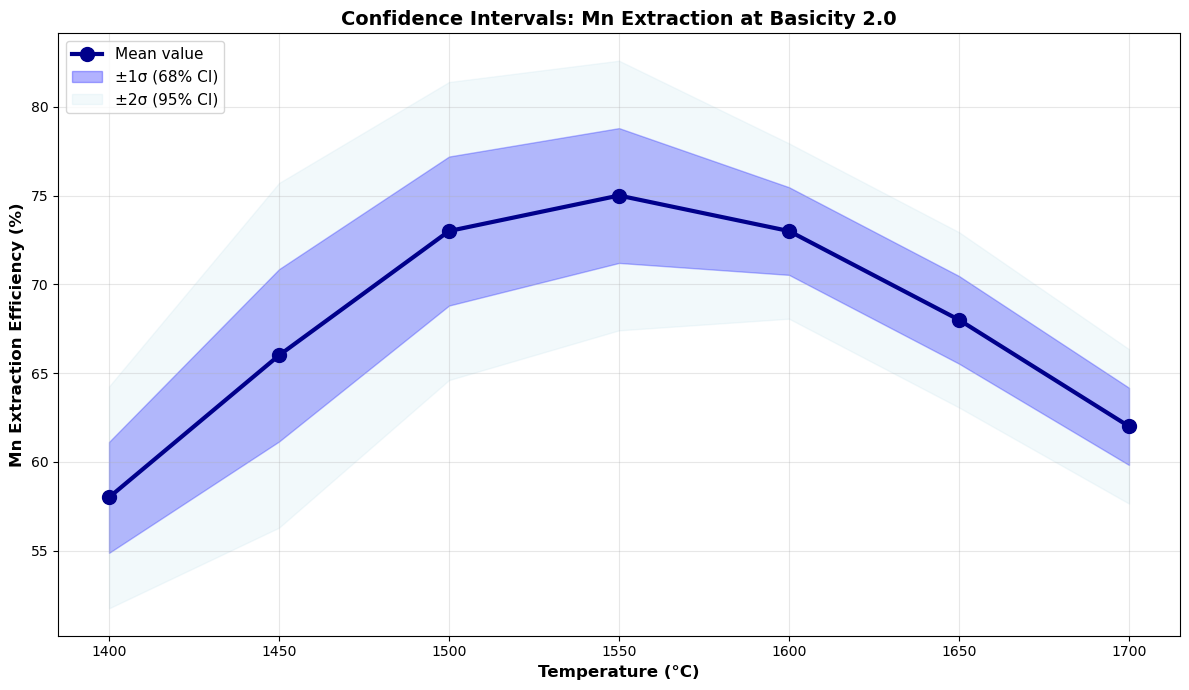

In [91]:
# Plot with confidence interval shading
plt.figure(figsize=(12, 7))

x = mn_data['Temperature_C']
y = mn_data['Basicity_2.0']
error = mn_data['Error_±']

# Main line
plt.plot(x, y, 'o-', linewidth=3, markersize=10, color='darkblue', label='Mean value')

# 1 standard deviation (68% confidence)
plt.fill_between(x, y - error, y + error, alpha=0.3, color='blue', label='±1σ (68% CI)')

# 2 standard deviations (95% confidence)
plt.fill_between(x, y - 2*error, y + 2*error, alpha=0.15, color='lightblue', label='±2σ (95% CI)')

plt.xlabel('Temperature (°C)', fontsize=12, fontweight='bold')
plt.ylabel('Mn Extraction Efficiency (%)', fontsize=12, fontweight='bold')
plt.title('Confidence Intervals: Mn Extraction at Basicity 2.0', 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=11, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

---
## Part 6: Statistical Analysis

### 6.1 Histograms and Distribution Fitting

In [92]:
# Load CO2 emissions time series
emissions_df = pd.read_csv('co2_emissions_timeseries.csv')
print(emissions_df.head())
print(f'\nData shape: {emissions_df.shape}')

         Date  CO2_Emissions_tons  Production_Volume_tons  \
0  2022-01-01         4899.342831             2904.165152   
1  2022-02-01         4912.347140             2962.868205   
2  2022-03-01         5169.345329             2778.733005   
3  2022-04-01         5374.605971             2760.758675   
4  2022-05-01         5718.923488             3162.505164   

   Energy_Consumption_MWh Operating_Status  CO2_Intensity_kg_per_ton  
0            32592.240554           Normal               1687.005585  
1            32522.110544           Normal               1657.970183  
2            32010.226913           Normal               1860.324586  
3            31530.825733           Normal               1946.785867  
4            29169.258516      Maintenance               1808.352300  

Data shape: (36, 6)


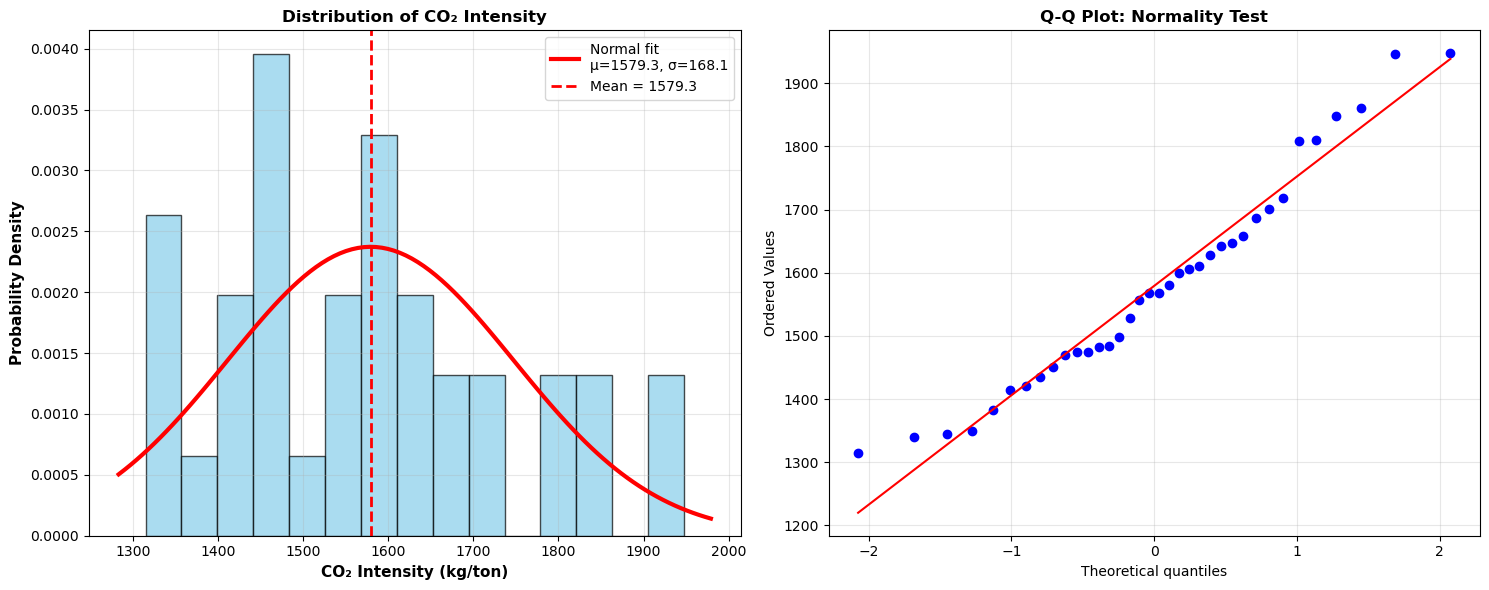


Shapiro-Wilk Test for Normality:
  Statistic: 0.9562
  P-value: 0.1639
  Result: Data is normally distributed (p > 0.05)


In [93]:
# Histogram with fitted normal distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# CO2 emissions histogram
data = emissions_df['CO2_Intensity_kg_per_ton']
axes[0].hist(data, bins=15, density=True, alpha=0.7, color='skyblue', edgecolor='black')

# Fit normal distribution
mu, std = stats.norm.fit(data)
xmin, xmax = axes[0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
axes[0].plot(x, p, 'r-', linewidth=3, label=f'Normal fit\nμ={mu:.1f}, σ={std:.1f}')
axes[0].axvline(mu, color='red', linestyle='--', linewidth=2, label=f'Mean = {mu:.1f}')
axes[0].set_xlabel('CO₂ Intensity (kg/ton)', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Probability Density', fontsize=11, fontweight='bold')
axes[0].set_title('Distribution of CO₂ Intensity', fontsize=12, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Q-Q plot for normality test
stats.probplot(data, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot: Normality Test', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Shapiro-Wilk test for normality
statistic, p_value = stats.shapiro(data)
print(f'\nShapiro-Wilk Test for Normality:')
print(f'  Statistic: {statistic:.4f}')
print(f'  P-value: {p_value:.4f}')
if p_value > 0.05:
    print('  Result: Data is normally distributed (p > 0.05)')
else:
    print('  Result: Data is NOT normally distributed (p < 0.05)')

### 6.2 Violin Plots and Box Plots

In [94]:
# Load ferroalloy composition data
composition_df = pd.read_csv('ferroalloy_composition_multivariate.csv')
print(composition_df.head())
print(f'\nData shape: {composition_df.shape}')

       Alloy_Type  Mn_percent  C_percent  Si_percent  P_percent  \
0  FerroManganese   76.993428   6.899147    1.056248   0.287766   
1  FerroManganese   75.723471   8.126139    1.144302   0.357492   
2  FerroManganese   77.295377   7.193251    0.868100   0.223836   
3  FerroManganese   79.046060   6.671145    0.841138   0.253787   
4  FerroManganese   75.531693   7.611272    1.443758   0.248631   

   Production_Temp_C  Energy_kWh_per_t  
0        1473.730958       2850.098570  
1        1422.718376       2869.289642  
2        1492.083829       2663.995056  
3        1407.944468       2846.450739  
4        1467.605713       2858.614495  

Data shape: (100, 7)


C:\Users\manik\AppData\Local\Temp\ipykernel_26980\3391823818.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=composition_df, x='Alloy_Type', y='Mn_percent',
C:\Users\manik\AppData\Local\Temp\ipykernel_26980\3391823818.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=composition_df, x='Alloy_Type', y='Si_percent',
C:\Users\manik\AppData\Local\Temp\ipykernel_26980\3391823818.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=composition_df, x='Alloy_Type', y='Production_Temp_C',
C:\Users\manik\AppData\Local\Temp\

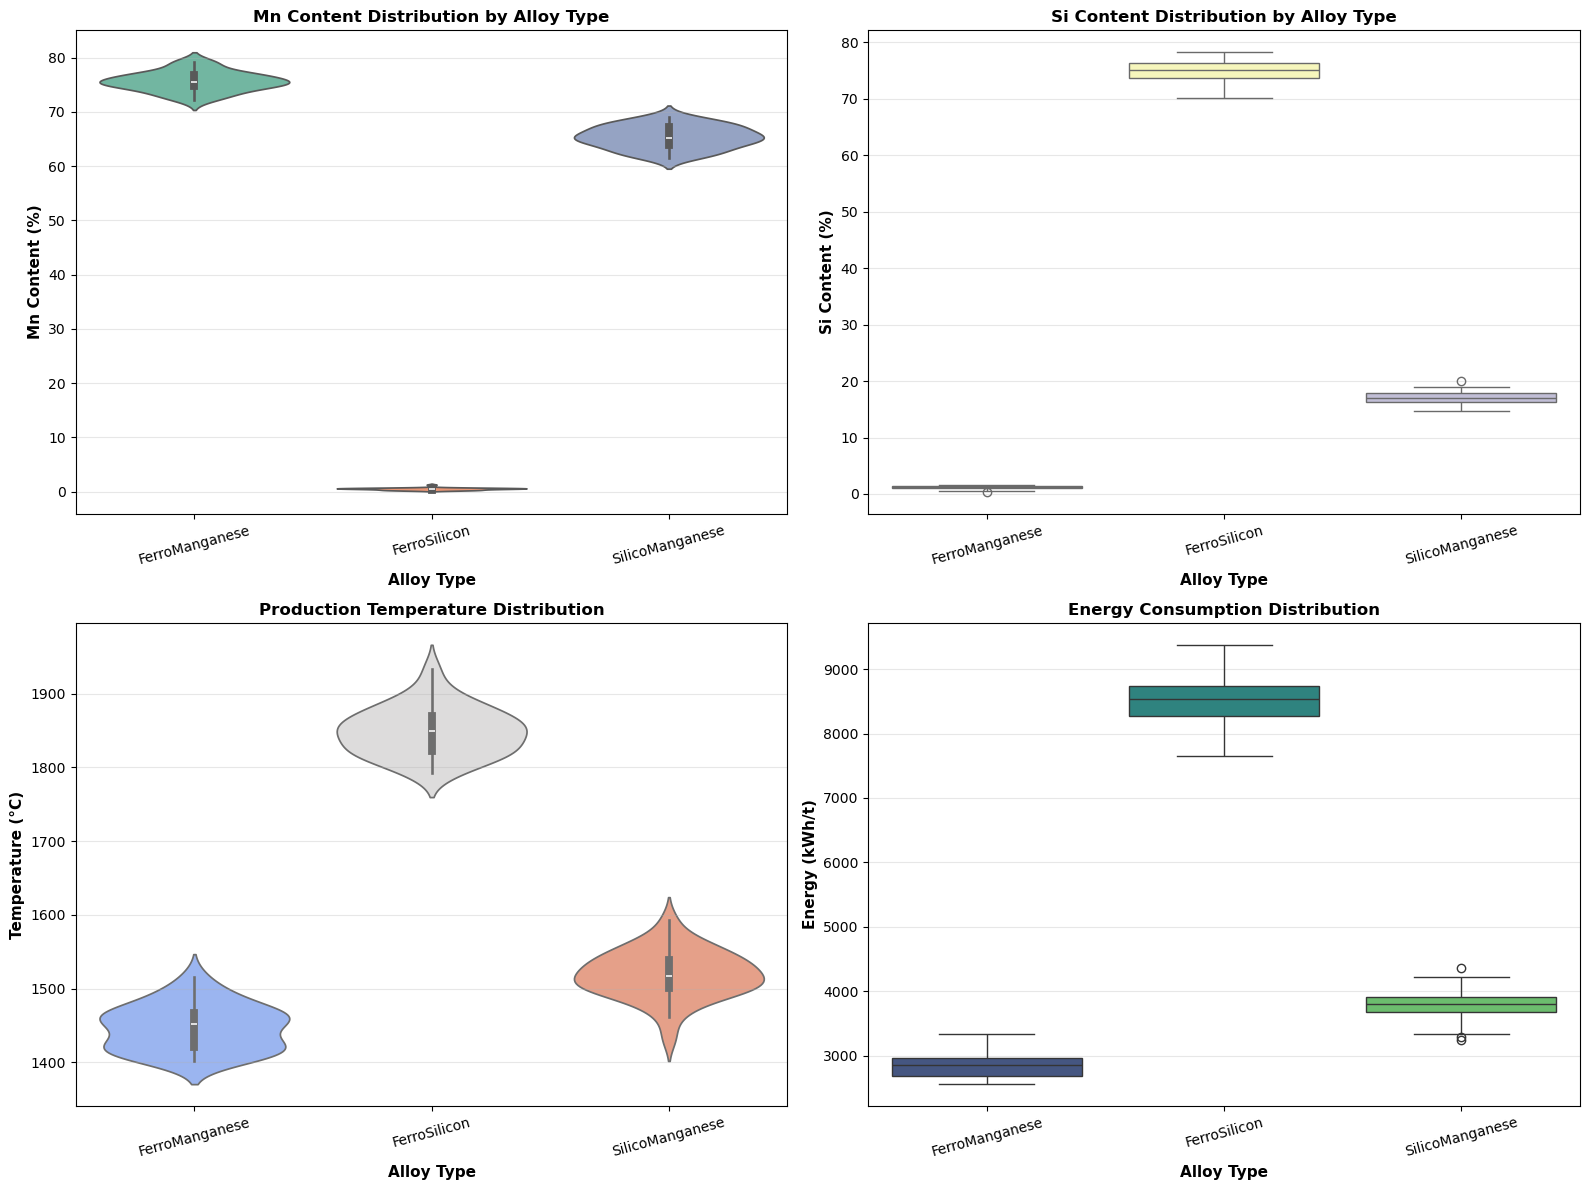

In [95]:
# Violin and box plots comparing alloy types
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Violin plot: Mn content
sns.violinplot(data=composition_df, x='Alloy_Type', y='Mn_percent', 
               ax=axes[0,0], palette='Set2')
axes[0,0].set_title('Mn Content Distribution by Alloy Type', fontsize=12, fontweight='bold')
axes[0,0].set_ylabel('Mn Content (%)', fontsize=11, fontweight='bold')
axes[0,0].grid(True, alpha=0.3, axis='y')

# Box plot: Si content
sns.boxplot(data=composition_df, x='Alloy_Type', y='Si_percent', 
            ax=axes[0,1], palette='Set3')
axes[0,1].set_title('Si Content Distribution by Alloy Type', fontsize=12, fontweight='bold')
axes[0,1].set_ylabel('Si Content (%)', fontsize=11, fontweight='bold')
axes[0,1].grid(True, alpha=0.3, axis='y')

# Violin plot: Production temperature
sns.violinplot(data=composition_df, x='Alloy_Type', y='Production_Temp_C', 
               ax=axes[1,0], palette='coolwarm')
axes[1,0].set_title('Production Temperature Distribution', fontsize=12, fontweight='bold')
axes[1,0].set_ylabel('Temperature (°C)', fontsize=11, fontweight='bold')
axes[1,0].grid(True, alpha=0.3, axis='y')

# Box plot: Energy consumption
sns.boxplot(data=composition_df, x='Alloy_Type', y='Energy_kWh_per_t', 
            ax=axes[1,1], palette='viridis')
axes[1,1].set_title('Energy Consumption Distribution', fontsize=12, fontweight='bold')
axes[1,1].set_ylabel('Energy (kWh/t)', fontsize=11, fontweight='bold')
axes[1,1].grid(True, alpha=0.3, axis='y')

for ax in axes.flat:
    ax.set_xlabel('Alloy Type', fontsize=11, fontweight='bold')
    ax.tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

### 6.3 Statistical Significance Testing

In [96]:
# ANOVA test: Compare energy consumption across alloy types
from scipy.stats import f_oneway

fm_energy = composition_df[composition_df['Alloy_Type']=='FerroManganese']['Energy_kWh_per_t']
fs_energy = composition_df[composition_df['Alloy_Type']=='FerroSilicon']['Energy_kWh_per_t']
sm_energy = composition_df[composition_df['Alloy_Type']=='SilicoManganese']['Energy_kWh_per_t']

f_stat, p_value = f_oneway(fm_energy, fs_energy, sm_energy)

print('ANOVA Test: Energy Consumption Across Alloy Types')
print('=' * 60)
print(f'F-statistic: {f_stat:.4f}')
print(f'P-value: {p_value:.4e}')
print(f'\nInterpretation:')
if p_value < 0.05:
    print('  Significant difference exists (p < 0.05)')
    print('  Energy consumption differs significantly between alloy types.')
else:
    print('  No significant difference (p >= 0.05)')

# Summary statistics
print('\nSummary Statistics by Alloy Type:')
print(composition_df.groupby('Alloy_Type')['Energy_kWh_per_t'].describe())

ANOVA Test: Energy Consumption Across Alloy Types
F-statistic: 3768.0741
P-value: 1.1151e-92

Interpretation:
  Significant difference exists (p < 0.05)
  Energy consumption differs significantly between alloy types.

Summary Statistics by Alloy Type:
                 count         mean         std          min          25%  \
Alloy_Type                                                                  
FerroManganese    30.0  2855.757324  189.473187  2561.739301  2684.763450   
FerroSilicon      35.0  8557.496756  383.834216  7650.441710  8264.740740   
SilicoManganese   35.0  3778.259060  246.136543  3247.216173  3676.540769   

                         50%          75%          max  
Alloy_Type                                              
FerroManganese   2856.976327  2962.663254  3344.033833  
FerroSilicon     8539.070439  8741.898101  9375.921173  
SilicoManganese  3804.604595  3907.035040  4367.673214  


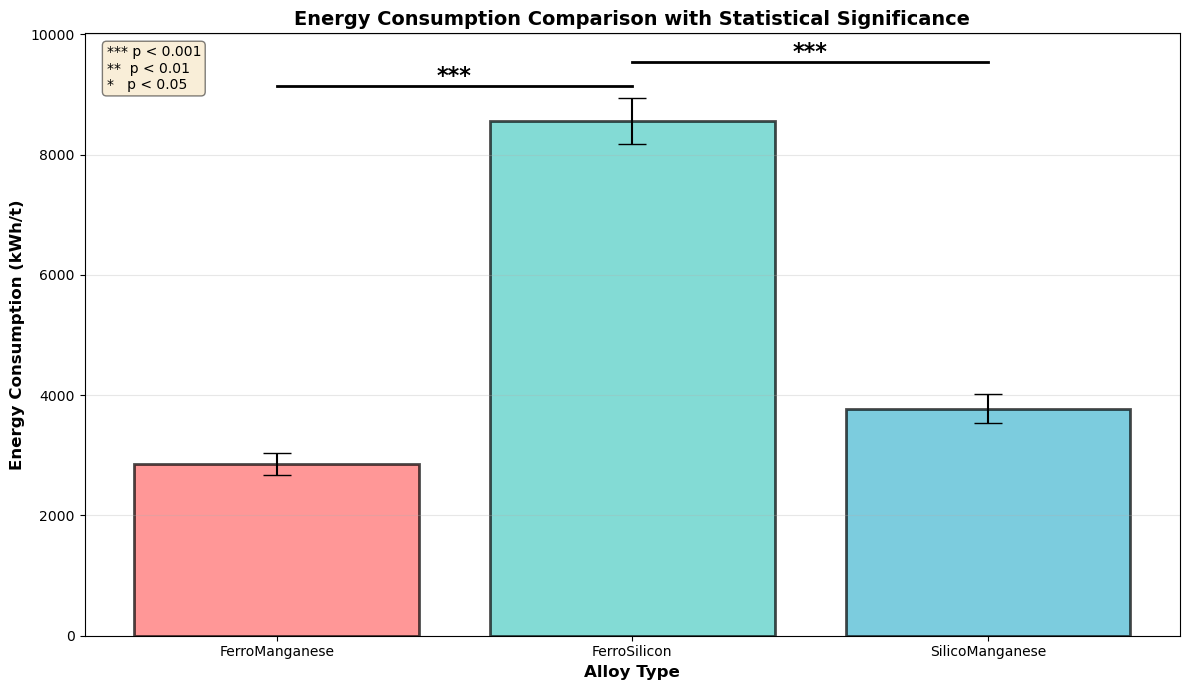


Pairwise t-test results:
FerroManganese vs FerroSilicon: t=-73.948, p=6.0676e-63
SilicoManganese vs FerroSilicon: t=-62.009, p=1.4042e-61


In [97]:
# Pairwise t-tests with significance visualization
from scipy.stats import ttest_ind

# Calculate means and plot with significance
fig, ax = plt.subplots(figsize=(12, 7))

alloy_types = composition_df['Alloy_Type'].unique()
means = [composition_df[composition_df['Alloy_Type']==at]['Energy_kWh_per_t'].mean() 
         for at in alloy_types]
stds = [composition_df[composition_df['Alloy_Type']==at]['Energy_kWh_per_t'].std() 
        for at in alloy_types]

x_pos = np.arange(len(alloy_types))
bars = ax.bar(x_pos, means, yerr=stds, capsize=10, alpha=0.7, 
              color=['#FF6B6B', '#4ECDC4', '#45B7D1'], edgecolor='black', linewidth=2)

# Add significance indicators
# Compare FerroSilicon vs others (it has highest energy)
y_max = max(means) + max(stds) + 200

# FerroManganese vs FerroSilicon
t_stat1, p_val1 = ttest_ind(fm_energy, fs_energy)
if p_val1 < 0.001:
    ax.plot([0, 1], [y_max, y_max], 'k-', linewidth=2)
    ax.text(0.5, y_max + 50, '***', ha='center', fontsize=16, fontweight='bold')

# SilicoManganese vs FerroSilicon
t_stat2, p_val2 = ttest_ind(sm_energy, fs_energy)
if p_val2 < 0.001:
    ax.plot([1, 2], [y_max + 400, y_max + 400], 'k-', linewidth=2)
    ax.text(1.5, y_max + 450, '***', ha='center', fontsize=16, fontweight='bold')

ax.set_ylabel('Energy Consumption (kWh/t)', fontsize=12, fontweight='bold')
ax.set_xlabel('Alloy Type', fontsize=12, fontweight='bold')
ax.set_title('Energy Consumption Comparison with Statistical Significance', 
             fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(alloy_types)
ax.grid(True, alpha=0.3, axis='y')

# Add legend for significance levels
ax.text(0.02, 0.98, '*** p < 0.001\n**  p < 0.01\n*   p < 0.05', 
        transform=ax.transAxes, fontsize=10, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print('\nPairwise t-test results:')
print(f'FerroManganese vs FerroSilicon: t={t_stat1:.3f}, p={p_val1:.4e}')
print(f'SilicoManganese vs FerroSilicon: t={t_stat2:.3f}, p={p_val2:.4e}')

---
## Part 7: Scatter Matrix (Pair Plot)

Visualize relationships between multiple variables simultaneously.

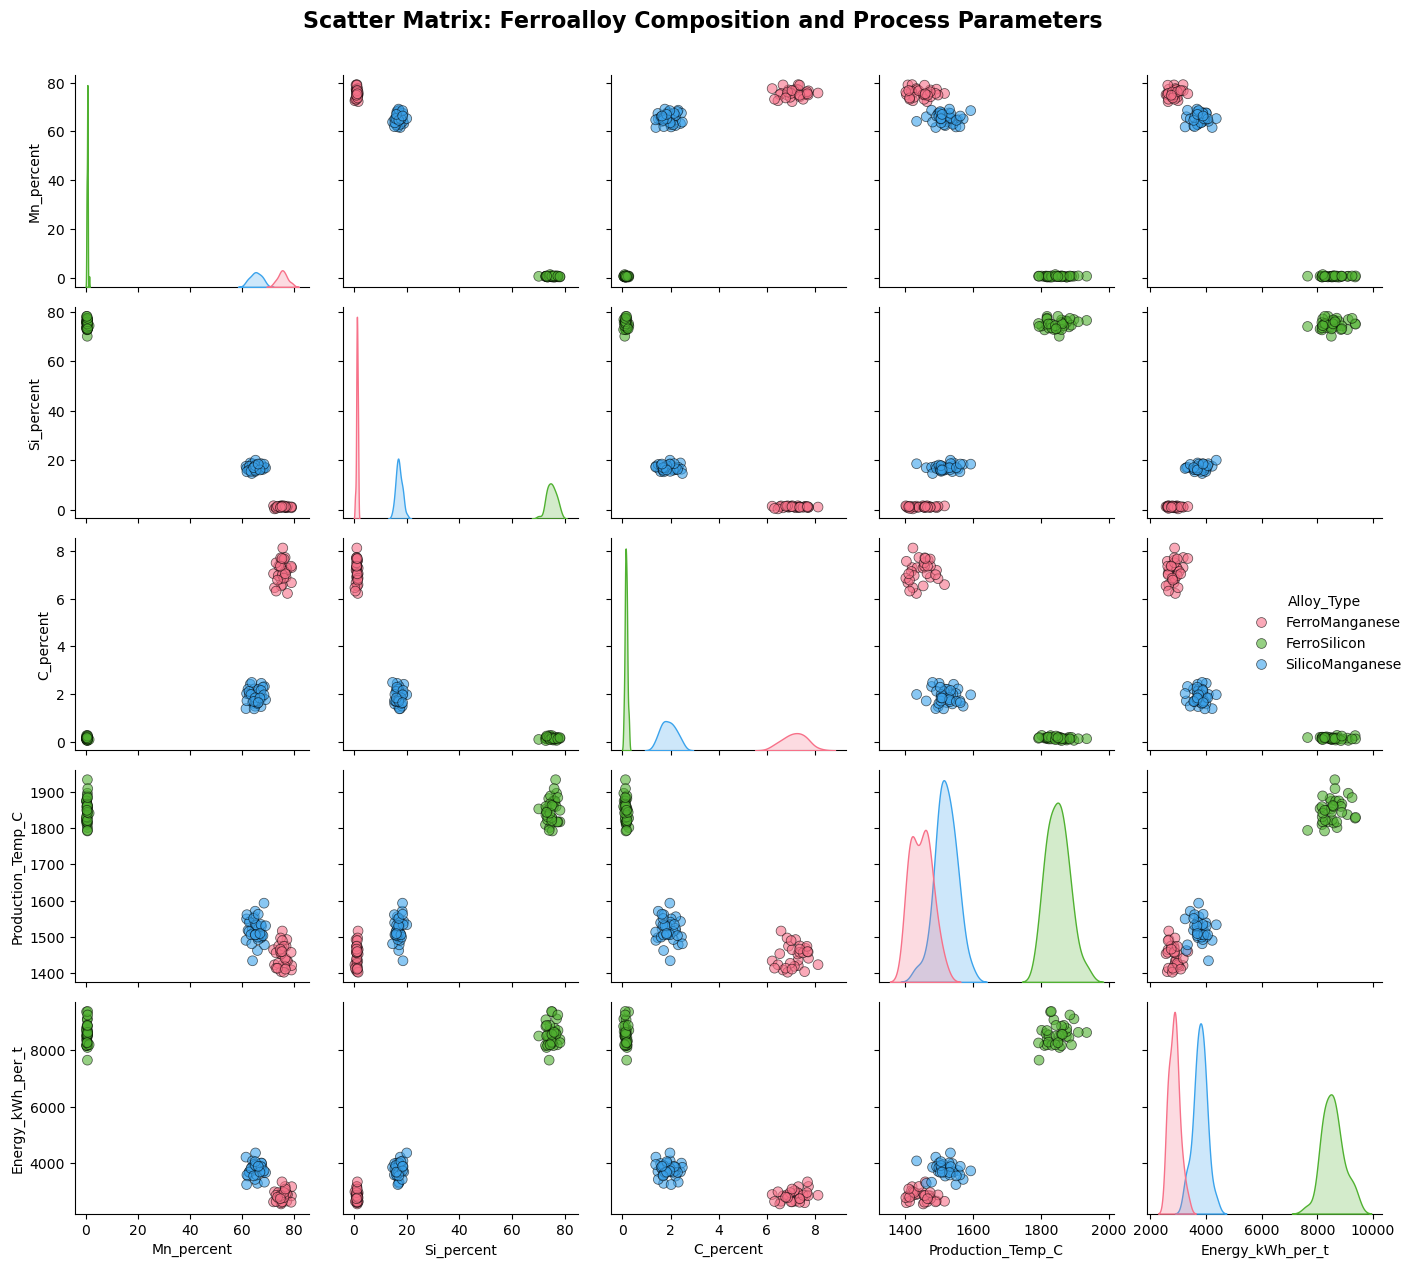

In [98]:
# Scatter matrix for ferroalloy composition
selected_cols = ['Mn_percent', 'Si_percent', 'C_percent', 'Production_Temp_C', 'Energy_kWh_per_t']

# Create pair plot
g = sns.pairplot(composition_df[selected_cols + ['Alloy_Type']], 
                hue='Alloy_Type', 
                palette='husl',
                diag_kind='kde',
                plot_kws={'alpha': 0.6, 's': 50, 'edgecolor': 'black'},
                height=2.5)

g.fig.suptitle('Scatter Matrix: Ferroalloy Composition and Process Parameters', 
               fontsize=16, fontweight='bold', y=1.01)

plt.tight_layout()
plt.show()

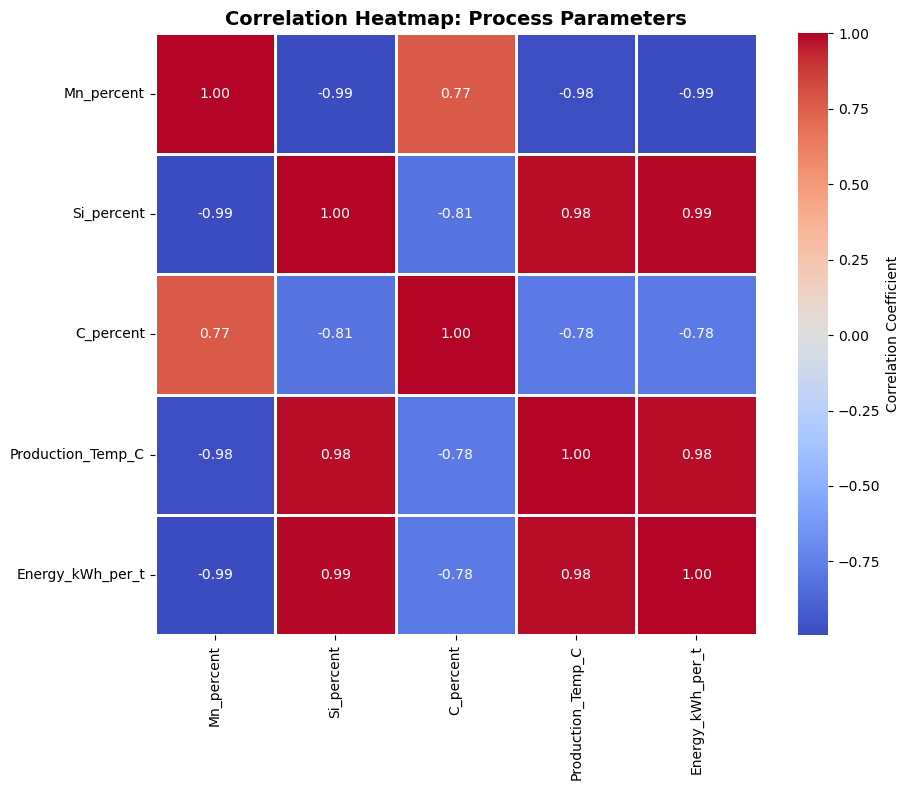


Key Correlations:
Mn_percent <-> Si_percent: r = -0.995
Si_percent <-> Energy_kWh_per_t: r = 0.992
Mn_percent <-> Energy_kWh_per_t: r = -0.992
Si_percent <-> Production_Temp_C: r = 0.984
Mn_percent <-> Production_Temp_C: r = -0.983


In [99]:
# Correlation heatmap
plt.figure(figsize=(10, 8))

# Calculate correlation matrix
corr_matrix = composition_df[selected_cols].corr()

# Create heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=2, 
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation Heatmap: Process Parameters', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print('\nKey Correlations:')
# Find strongest correlations
corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_pairs.append((
            corr_matrix.columns[i], 
            corr_matrix.columns[j], 
            corr_matrix.iloc[i, j]
        ))
corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

for var1, var2, corr in corr_pairs[:5]:
    print(f'{var1} <-> {var2}: r = {corr:.3f}')

---
## Part 8: Advanced Applications for FME ZeMe

### 8.1 Energy Efficiency Analysis

       Production_Step  Energy_kWh_per_t  CO2_Direct_kg_per_t  \
0     Alumina Refining               242                  615   
1     Anode Production               155                  447   
2     Primary Smelting             15000                 2025   
3      Primary Casting               125                  135   
4  Secondary Remelting               230                  250   

   CO2_Indirect_kg_per_t  CO2_Total_kg_per_t  
0                    113                 728  
1                     72                 519  
2                   6975                9000  
3                     58                 193  
4                    107                 357  


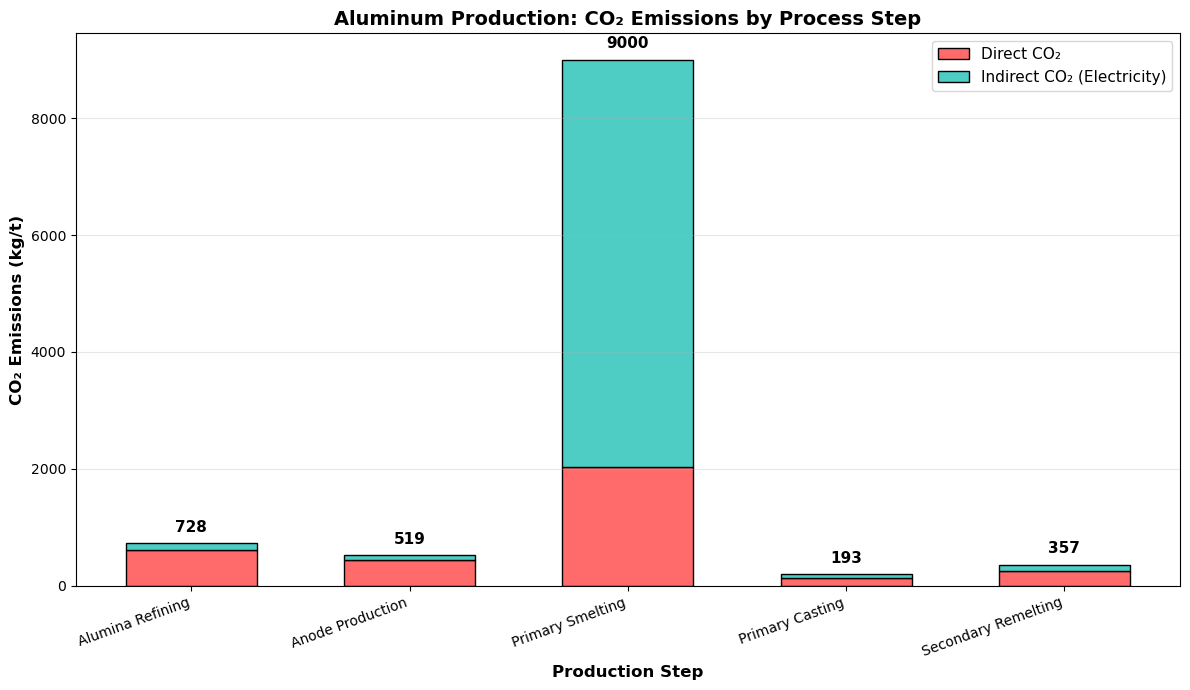


Total CO₂ per tonne Aluminum: 10797 kg
Primary Smelting accounts for: 83.4%


In [100]:
# Load aluminum energy data
al_energy = pd.read_csv('aluminum_energy_emissions.csv')
print(al_energy)

# Create stacked bar chart
fig, ax = plt.subplots(figsize=(12, 7))

x_pos = np.arange(len(al_energy))
width = 0.6

# Stacked bars
p1 = ax.bar(x_pos, al_energy['CO2_Direct_kg_per_t'], width, 
            label='Direct CO₂', color='#FF6B6B', edgecolor='black')
p2 = ax.bar(x_pos, al_energy['CO2_Indirect_kg_per_t'], width,
            bottom=al_energy['CO2_Direct_kg_per_t'],
            label='Indirect CO₂ (Electricity)', color='#4ECDC4', edgecolor='black')

# Add total labels on top
for i, total in enumerate(al_energy['CO2_Total_kg_per_t']):
    ax.text(i, total + 200, f'{total:.0f}', ha='center', 
           fontsize=11, fontweight='bold')

ax.set_ylabel('CO₂ Emissions (kg/t)', fontsize=12, fontweight='bold')
ax.set_xlabel('Production Step', fontsize=12, fontweight='bold')
ax.set_title('Aluminum Production: CO₂ Emissions by Process Step', 
             fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(al_energy['Production_Step'], rotation=20, ha='right')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f'\nTotal CO₂ per tonne Aluminum: {al_energy["CO2_Total_kg_per_t"].sum():.0f} kg')
print(f'Primary Smelting accounts for: {al_energy.loc[2, "CO2_Total_kg_per_t"] / al_energy["CO2_Total_kg_per_t"].sum() * 100:.1f}%')

### 8.2 Time Series Analysis: CO₂ Reduction Trends

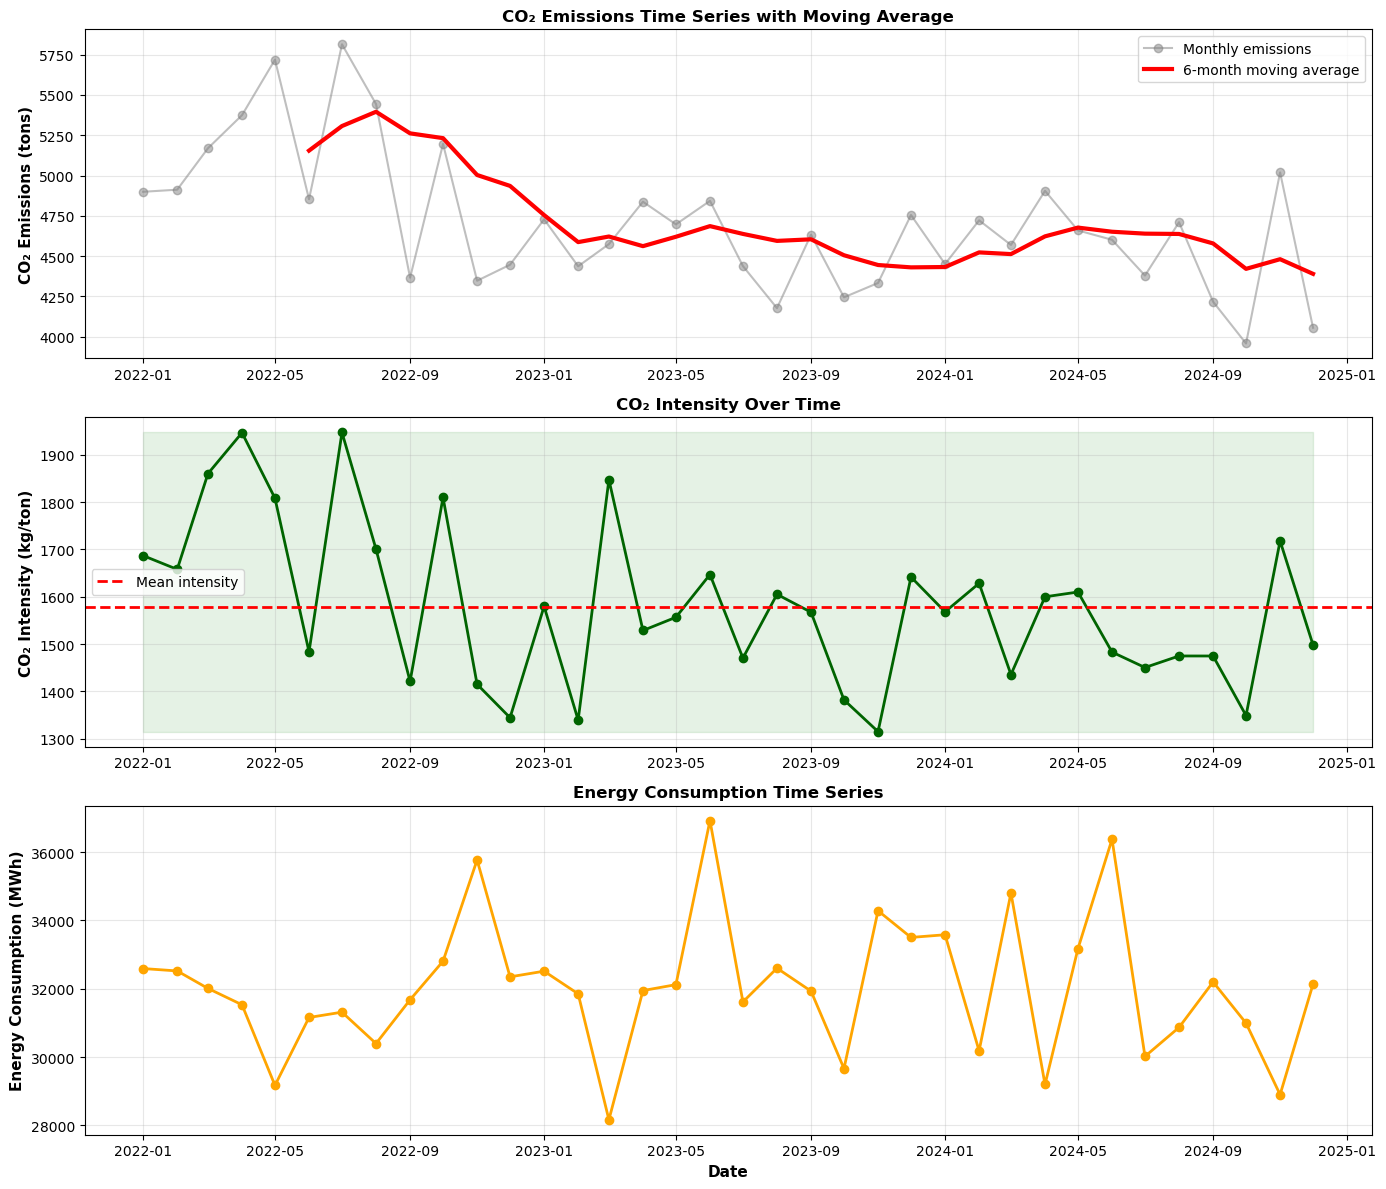


CO₂ Intensity Reduction Analysis:
  2022 Average: 1673.6 kg/ton
  2024 Average: 1524.2 kg/ton
  Reduction: 8.9%


In [101]:
# Time series decomposition and trend analysis
emissions_df['Date'] = pd.to_datetime(emissions_df['Date'])
emissions_df = emissions_df.sort_values('Date')

fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# 1. CO2 emissions over time with rolling average
rolling_window = 6
emissions_df['Rolling_Mean'] = emissions_df['CO2_Emissions_tons'].rolling(window=rolling_window).mean()

axes[0].plot(emissions_df['Date'], emissions_df['CO2_Emissions_tons'], 
            'o-', color='gray', alpha=0.5, label='Monthly emissions')
axes[0].plot(emissions_df['Date'], emissions_df['Rolling_Mean'], 
            '-', color='red', linewidth=3, label=f'{rolling_window}-month moving average')
axes[0].set_ylabel('CO₂ Emissions (tons)', fontsize=11, fontweight='bold')
axes[0].set_title('CO₂ Emissions Time Series with Moving Average', 
                 fontsize=12, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# 2. CO2 intensity
axes[1].plot(emissions_df['Date'], emissions_df['CO2_Intensity_kg_per_ton'], 
            'o-', color='darkgreen', linewidth=2, markersize=6)
axes[1].axhline(emissions_df['CO2_Intensity_kg_per_ton'].mean(), 
               color='red', linestyle='--', linewidth=2, label='Mean intensity')
axes[1].fill_between(emissions_df['Date'], 
                     emissions_df['CO2_Intensity_kg_per_ton'].min(),
                     emissions_df['CO2_Intensity_kg_per_ton'].max(),
                     alpha=0.1, color='green')
axes[1].set_ylabel('CO₂ Intensity (kg/ton)', fontsize=11, fontweight='bold')
axes[1].set_title('CO₂ Intensity Over Time', fontsize=12, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

# 3. Energy consumption
axes[2].plot(emissions_df['Date'], emissions_df['Energy_Consumption_MWh'], 
            'o-', color='orange', linewidth=2, markersize=6)
axes[2].set_ylabel('Energy Consumption (MWh)', fontsize=11, fontweight='bold')
axes[2].set_xlabel('Date', fontsize=11, fontweight='bold')
axes[2].set_title('Energy Consumption Time Series', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate reduction rate
first_year_avg = emissions_df[emissions_df['Date'].dt.year == 2022]['CO2_Intensity_kg_per_ton'].mean()
last_year_avg = emissions_df[emissions_df['Date'].dt.year == 2024]['CO2_Intensity_kg_per_ton'].mean()
reduction_pct = ((first_year_avg - last_year_avg) / first_year_avg) * 100

print(f'\nCO₂ Intensity Reduction Analysis:')
print(f'  2022 Average: {first_year_avg:.1f} kg/ton')
print(f'  2024 Average: {last_year_avg:.1f} kg/ton')
print(f'  Reduction: {reduction_pct:.1f}%')

### 8.3 Optimization: Finding Optimal Operating Conditions

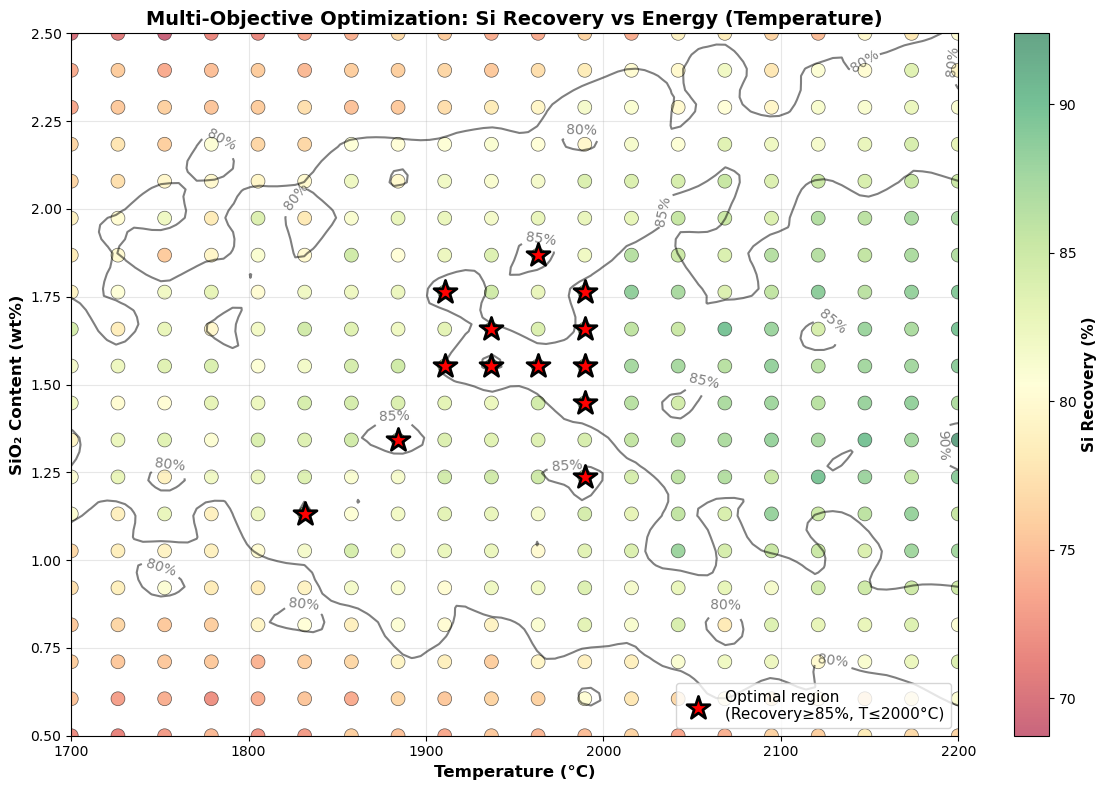


Optimal operating region:
  Number of optimal points: 13
  Temperature range: 1831.6 - 1989.5°C
  SiO₂ range: 1.13 - 1.87 wt%
  Recovery range: 85.1 - 90.6%


In [102]:
# Multi-objective optimization visualization
# Goal: Maximize Si recovery while minimizing temperature (energy)

fig, ax = plt.subplots(figsize=(12, 8))

# Create scatter plot colored by recovery
scatter = ax.scatter(si_data['Temperature_C'], 
                    si_data['SiO2_wt_percent'],
                    c=si_data['Si_Recovery_percent'],
                    s=100, cmap='RdYlGn', alpha=0.6,
                    edgecolors='black', linewidth=0.5)

# Find Pareto-optimal points (high recovery, low temperature)
threshold_recovery = 85
threshold_temp = 2000

optimal_points = si_data[
    (si_data['Si_Recovery_percent'] >= threshold_recovery) & 
    (si_data['Temperature_C'] <= threshold_temp)
]

ax.scatter(optimal_points['Temperature_C'],
          optimal_points['SiO2_wt_percent'],
          s=300, marker='*', c='red', edgecolors='black',
          linewidth=2, zorder=10, label=f'Optimal region\n(Recovery≥{threshold_recovery}%, T≤{threshold_temp}°C)')

# Add contour lines
from scipy.interpolate import griddata
T_grid = np.linspace(si_data['Temperature_C'].min(), si_data['Temperature_C'].max(), 100)
SiO2_grid = np.linspace(si_data['SiO2_wt_percent'].min(), si_data['SiO2_wt_percent'].max(), 100)
T_mesh, SiO2_mesh = np.meshgrid(T_grid, SiO2_grid)
Recovery_mesh = griddata(
    (si_data['Temperature_C'], si_data['SiO2_wt_percent']),
    si_data['Si_Recovery_percent'],
    (T_mesh, SiO2_mesh),
    method='cubic'
)
contours = ax.contour(T_mesh, SiO2_mesh, Recovery_mesh, 
                     levels=[80, 85, 90], colors='black', linewidths=1.5, alpha=0.5)
ax.clabel(contours, inline=True, fontsize=10, fmt='%d%%')

ax.set_xlabel('Temperature (°C)', fontsize=12, fontweight='bold')
ax.set_ylabel('SiO₂ Content (wt%)', fontsize=12, fontweight='bold')
ax.set_title('Multi-Objective Optimization: Si Recovery vs Energy (Temperature)', 
            fontsize=14, fontweight='bold')
ax.legend(fontsize=11, loc='lower right')
ax.grid(True, alpha=0.3)

cbar = plt.colorbar(scatter, ax=ax, label='Si Recovery (%)')
cbar.set_label('Si Recovery (%)', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print(f'\nOptimal operating region:')
print(f'  Number of optimal points: {len(optimal_points)}')
print(f'  Temperature range: {optimal_points["Temperature_C"].min():.1f} - {optimal_points["Temperature_C"].max():.1f}°C')
print(f'  SiO₂ range: {optimal_points["SiO2_wt_percent"].min():.2f} - {optimal_points["SiO2_wt_percent"].max():.2f} wt%')
print(f'  Recovery range: {optimal_points["Si_Recovery_percent"].min():.1f} - {optimal_points["Si_Recovery_percent"].max():.1f}%')

---
## Summary and Key Takeaways

### Skills Covered:

1. **Basic Plotting**: Line and scatter plots for time series and correlations
2. **Multi-axis Plots**: Comparing variables with different scales
3. **Regression Analysis**: Linear, polynomial, and non-linear curve fitting
4. **3D Visualization**: Surface plots, contours for process optimization
5. **Statistical Analysis**: Error bars, confidence intervals, significance testing
6. **Distribution Analysis**: Histograms, Q-Q plots, violin plots
7. **Multivariate Analysis**: Scatter matrices, correlation heatmaps
8. **Advanced Applications**: Energy efficiency, time series, optimization

### Python Libraries Used:
- **matplotlib**: Core plotting functionality
- **seaborn**: Statistical data visualization
- **pandas**: Data manipulation and analysis
- **numpy**: Numerical computations
- **scipy**: Scientific computing and statistics
- **sklearn**: Machine learning and regression

### Applications to FME ZeMe Research:
- Process optimization (temperature, composition)
- Energy efficiency analysis
- CO₂ emissions tracking and reduction
- Quality control and statistical process control
- Predictive modeling for metal production

### Next Steps:
1. Apply these techniques to your own metallurgical data
2. Explore machine learning for predictive modeling
3. Integrate with experimental design and optimization algorithms
4. Develop automated reporting and monitoring systems

---

**Thank you for participating in this workshop!**

*For questions and further assistance, contact FME ZeMe*

In [ ]:
# Final exercise: Create your own plot combining multiple techniques!
# Use any of the datasets provided and apply what you've learned

# Your code here:
